In [1]:
import pandas as pd
import geopandas as gpd
import urllib.request
import os
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans


In [2]:
for year in [2021]:
    for month in range(1,13):
        urllib.request.urlretrieve ("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_%s-%s.parquet"%(str(year),str(month).rjust(2, '0')), 
                                    "yellow_taxi/yellow_tripdata_%s-%s.parquet"%(str(year),str(month).rjust(2, '0')))

In [3]:
files = os.listdir('yellow_taxi/')
dflist = []
for index, filename in enumerate(files):
    if '.parquet' in filename:
        if index == 0:
            df = pd.read_parquet('yellow_taxi/' + filename)
        else:
            df = pd.read_parquet('yellow_taxi/' + filename)
        dflist.append(df)
dfTaxi_yellow = pd.concat(dflist, axis = 0, ignore_index = True)
dfTaxi_yellow.count()

VendorID                 30904308
tpep_pickup_datetime     30904308
tpep_dropoff_datetime    30904308
passenger_count          29425613
trip_distance            30904308
RatecodeID               29425613
store_and_fwd_flag       29425613
PULocationID             30904308
DOLocationID             30904308
payment_type             30904308
fare_amount              30904308
extra                    30904308
mta_tax                  30904308
tip_amount               30904308
tolls_amount             30904308
improvement_surcharge    30904308
total_amount             30904308
congestion_surcharge     29425613
airport_fee              25262890
dtype: int64

In [4]:
dfTaxi_yellow

VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0                1  2021-01-01 00:30:10   2021-01-01 00:36:12   
1                1  2021-01-01 00:51:20   2021-01-01 00:52:19   
2                1  2021-01-01 00:43:30   2021-01-01 01:11:06   
3                1  2021-01-01 00:15:48   2021-01-01 00:31:01   
4                2  2021-01-01 00:31:49   2021-01-01 00:48:21   
...            ...                  ...                   ...   
30904303         2  2021-12-31 23:18:02   2021-12-31 23:32:19   
30904304         2  2021-12-31 23:46:00   2022-01-01 00:07:00   
30904305         2  2021-12-31 23:46:00   2022-01-01 00:04:00   
30904306         2  2021-12-31 23:53:00   2022-01-01 00:02:00   
30904307         2  2021-12-31 23:19:28   2021-12-31 23:26:30   

          passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                     1.0           2.10         1.0                  N   
1                     1.0           0.20         1.0                  N   
2                     1.0          14.70         1.0                  N   
3                     0.0          10.60         1.0                  N   
4                     1.0           4.94         1.0                  N   
...                   ...            ...         ...                ...   
30904303              NaN           3.99         NaN               None   
30904304              NaN           5.96         NaN               None   
30904305              NaN           4.99         NaN               None   
30904306              NaN           1.36         NaN               None   
30904307              NaN           1.99         NaN               None   

          PULocationID  DOLocationID  payment_type  fare_amount  extra  \
0                  142            43             2         8.00    3.0   
1                  238           151             2         3.00    0.5   
2                  132           165             1        42.00    0.5   
3                  138           132             1        29.00    0.5   
4                   68            33             1        16.50    0.5   
...                ...           ...           ...          ...    ...   
30904303           145           107             0        17.42    0.0   
30904304           236           158             0        23.05    0.0   
30904305            48            13             0        20.97    0.0   
30904306            75            75             0        13.20    0.0   
30904307           170           237             0        13.20    0.0   

          mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
0             0.5        0.00           0.0                    0.3   
1             0.5        0.00           0.0                    0.3   
2             0.5        8.65           0.0                    0.3   
3             0.5        6.05           0.0                    0.3   
4             0.5        4.06           0.0                    0.3   
...           ...         ...           ...                    ...   
30904303      0.5        5.80           0.0                    0.3   
30904304      0.5        2.85           0.0                    0.3   
30904305      0.5        5.23           0.0                    0.3   
30904306      0.5        2.00           0.0                    0.3   
30904307      0.5        2.63           0.0                    0.3   

          total_amount  congestion_surcharge  airport_fee  
0                11.80                   2.5          NaN  
1                 4.30                   0.0          NaN  
2                51.95                   0.0          NaN  
3                36.35                   0.0          NaN  
4                24.36                   2.5          NaN  
...                ...                   ...          ...  
30904303         26.52                   NaN          NaN  
30904304         29.20                   NaN          NaN  
30904305         29.50                   NaN          NaN 

In [5]:
taxi = gpd.read_file('https://data.cityofnewyork.us/api/geospatial/d3c5-ddgc?method=export&format=Shapefile')

In [6]:
taxi.head()

borough  location_i  objectid  shape_area  shape_leng  \
0            EWR         1.0       1.0    0.000782    0.116357   
1         Queens         2.0       2.0    0.004866    0.433470   
2          Bronx         3.0       3.0    0.000314    0.084341   
3      Manhattan         4.0       4.0    0.000112    0.043567   
4  Staten Island         5.0       5.0    0.000498    0.092146   

                      zone                                           geometry  
0           Newark Airport  POLYGON ((-74.18445 40.69500, -74.18449 40.695...  
1              Jamaica Bay  MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...  
2  Allerton/Pelham Gardens  POLYGON ((-73.84793 40.87134, -73.84725 40.870...  
3            Alphabet City  POLYGON ((-73.97177 40.72582, -73.97179 40.725...  
4            Arden Heights  POLYGON ((-74.17422 40.56257, -74.17349 40.562...

In [7]:
dfTaxi_yellow=dfTaxi_yellow.dropna()

In [8]:
dfTaxi_yellow

VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
157615           1  2021-01-05 18:55:22   2021-01-05 19:04:57   
159867           1  2021-01-05 19:58:59   2021-01-05 20:04:58   
161304           1  2021-01-05 20:12:38   2021-01-05 20:22:53   
161305           1  2021-01-05 20:26:52   2021-01-05 20:51:27   
449168           1  2021-01-12 18:34:41   2021-01-12 18:37:18   
...            ...                  ...                   ...   
30801932         2  2021-12-31 23:27:31   2021-12-31 23:32:32   
30801933         2  2021-12-31 23:20:49   2021-12-31 23:21:59   
30801934         2  2021-12-31 23:07:23   2021-12-31 23:12:45   
30801935         2  2021-12-31 23:18:30   2021-12-31 23:31:20   
30801936         2  2021-12-31 23:53:00   2022-01-01 00:03:53   

          passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
157615                2.0           5.10         1.0                  Y   
159867                1.0           2.00         1.0                  Y   
161304                1.0           2.10         1.0                  Y   
161305                1.0          10.30         1.0                  Y   
449168                1.0           0.70         1.0                  Y   
...                   ...            ...         ...                ...   
30801932              2.0           0.95         1.0                  N   
30801933              1.0           0.16         1.0                  N   
30801934              2.0           1.05         1.0                  N   
30801935              1.0           2.31         1.0                  N   
30801936              2.0           5.14         1.0                  N   

          PULocationID  DOLocationID  payment_type  fare_amount  extra  \
157615             262           232             1         15.5    3.0   
159867             262           162             2          8.0    2.5   
161304             234           230             1          9.5    2.5   
161305             230           138             2         30.0    2.5   
449168             265           265             3          4.5    1.0   
...                ...           ...           ...          ...    ...   
30801932           164           137             1          5.5    0.5   
30801933           162           229             2          3.0    0.5   
30801934           237           229             1          6.0    0.5   
30801935           141           239             1         11.0    0.5   
30801936           141            79             1         16.0    0.5   

          mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
157615        0.5        3.85          0.00                    0.3   
159867        0.5        0.00          0.00                    0.3   
161304        0.5        2.55          0.00                    0.3   
161305        0.5        0.00          6.55                    0.3   
449168        0.5        0.00          0.00                    0.3   
...           ...         ...           ...                    ...   
30801932      0.5        1.70          0.00                    0.3   
30801933      0.5        0.00          0.00                    0.3   
30801934      0.5        2.45          0.00                    0.3   
30801935      0.5        1.00          0.00                    0.3   
30801936      0.5        3.96          0.00                    0.3   

          total_amount  congestion_surcharge  airport_fee  
157615           23.15                   2.5          0.0  
159867           11.30                   2.5          0.0  
161304           15.35                   2.5          0.0  
161305           39.85                   2.5          0.0  
449168            6.30                   0.0          0.0  
...                ...                   ...          ...  
30801932         11.00                   2.5          0.0  
30801933          6.80                   2.5          0.0  
30801934         12.25                   2.5          0.0 

In [9]:
dfTaxi_yellow.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [10]:
#only take what we need
dfY=dfTaxi_yellow[['tpep_pickup_datetime','passenger_count', 'trip_distance','PULocationID']]

## all day case

In [11]:
dfY
#this is for general case that all day matters

tpep_pickup_datetime  passenger_count  trip_distance  PULocationID
157615    2021-01-05 18:55:22              2.0           5.10           262
159867    2021-01-05 19:58:59              1.0           2.00           262
161304    2021-01-05 20:12:38              1.0           2.10           234
161305    2021-01-05 20:26:52              1.0          10.30           230
449168    2021-01-12 18:34:41              1.0           0.70           265
...                       ...              ...            ...           ...
30801932  2021-12-31 23:27:31              2.0           0.95           164
30801933  2021-12-31 23:20:49              1.0           0.16           162
30801934  2021-12-31 23:07:23              2.0           1.05           237
30801935  2021-12-31 23:18:30              1.0           2.31           141
30801936  2021-12-31 23:53:00              2.0           5.14           141

[25262890 rows x 4 columns]

In [12]:
dfY = dfY.groupby(by='PULocationID', as_index=False).count()[['PULocationID', 'passenger_count']].rename(columns={'passenger_count':'N_trips'})


In [13]:
dfY.sort_values(by='N_trips')

PULocationID  N_trips
107           110        1
98             99        6
26             27        7
1               2        8
173           176        8
..            ...      ...
183           186   865196
158           161   929949
129           132   934213
233           236  1157215
234           237  1292317

[263 rows x 2 columns]

## first we plot the general trips per zipcode to see which zipcode has more trips

Text(0.5, 1.0, 'yellow taxi trips by location id')

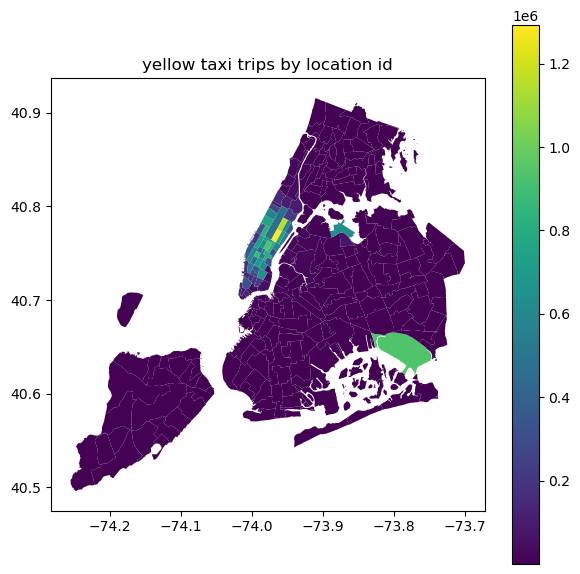

In [14]:
byZip_plot = taxi.merge(dfY, left_on='location_i', right_on='PULocationID')
byZip_plot.plot(column='N_trips', figsize=(7,7), legend=True)
plt.title('yellow taxi trips by location id')

#### This time we normalize our data by calculating the desity of trips, we can see which zipcode has the higher density of trips count.

Text(0.5, 1.0, 'normalized yellow taxi trips by location id')

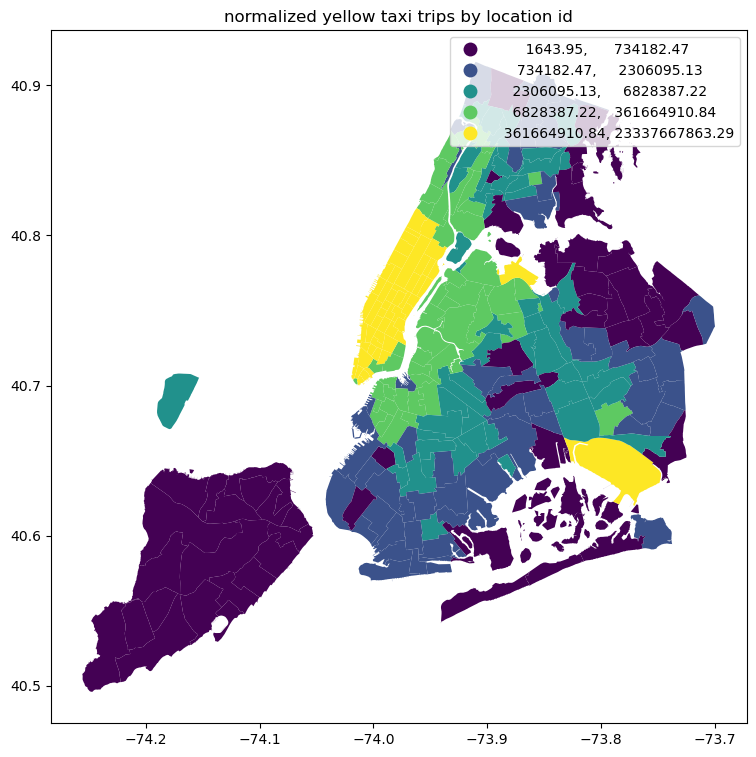

In [15]:
# normalize number of complaints by area and plot

# convert sq.ft. to sq.miles
byZip_plot['area_sqMile'] = byZip_plot['shape_area']
# divide by area
byZip_plot['complaints_norm'] = byZip_plot['N_trips']/byZip_plot['area_sqMile']
byZip_plot.plot(column='complaints_norm', figsize=(9,9), scheme='quantiles', legend=True)
plt.title('normalized yellow taxi trips by location id')

In [16]:
# here we will focus on the rush hours of the day

In [17]:
df=dfTaxi_yellow[['tpep_pickup_datetime','passenger_count', 'trip_distance','PULocationID']]
df

tpep_pickup_datetime  passenger_count  trip_distance  PULocationID
157615    2021-01-05 18:55:22              2.0           5.10           262
159867    2021-01-05 19:58:59              1.0           2.00           262
161304    2021-01-05 20:12:38              1.0           2.10           234
161305    2021-01-05 20:26:52              1.0          10.30           230
449168    2021-01-12 18:34:41              1.0           0.70           265
...                       ...              ...            ...           ...
30801932  2021-12-31 23:27:31              2.0           0.95           164
30801933  2021-12-31 23:20:49              1.0           0.16           162
30801934  2021-12-31 23:07:23              2.0           1.05           237
30801935  2021-12-31 23:18:30              1.0           2.31           141
30801936  2021-12-31 23:53:00              2.0           5.14           141

[25262890 rows x 4 columns]

In [18]:
df['pickUpHour'] = df['tpep_pickup_datetime'].dt.hour

In [19]:
df

tpep_pickup_datetime  passenger_count  trip_distance  PULocationID  \
157615    2021-01-05 18:55:22              2.0           5.10           262   
159867    2021-01-05 19:58:59              1.0           2.00           262   
161304    2021-01-05 20:12:38              1.0           2.10           234   
161305    2021-01-05 20:26:52              1.0          10.30           230   
449168    2021-01-12 18:34:41              1.0           0.70           265   
...                       ...              ...            ...           ...   
30801932  2021-12-31 23:27:31              2.0           0.95           164   
30801933  2021-12-31 23:20:49              1.0           0.16           162   
30801934  2021-12-31 23:07:23              2.0           1.05           237   
30801935  2021-12-31 23:18:30              1.0           2.31           141   
30801936  2021-12-31 23:53:00              2.0           5.14           141   

          pickUpHour  
157615            18  
159867            19  
161304            20  
161305            20  
449168            18  
...              ...  
30801932          23  
30801933          23  
30801934          23  
30801935          23  
30801936          23  

[25262890 rows x 5 columns]

In [20]:
tripsByHour = df[['pickUpHour', 'PULocationID']].groupby(by='pickUpHour', as_index=False).count()
tripsByHour.rename(columns={'PULocationID':'N_trips'}, inplace=True)

In [21]:
tripsByHour

pickUpHour  N_trips
0            0   611287
1            1   394304
2            2   257086
3            3   161954
4            4   105094
5            5   132871
6            6   369711
7            7   689188
8            8   955095
9            9  1108765
10          10  1254317
11          11  1378421
12          12  1510697
13          13  1548635
14          14  1672898
15          15  1708090
16          16  1653192
17          17  1759918
18          18  1813318
19          19  1618376
20          20  1339358
21          21  1233262
22          22  1108726
23          23   878327

Text(0.5, 0, 'hour of day')

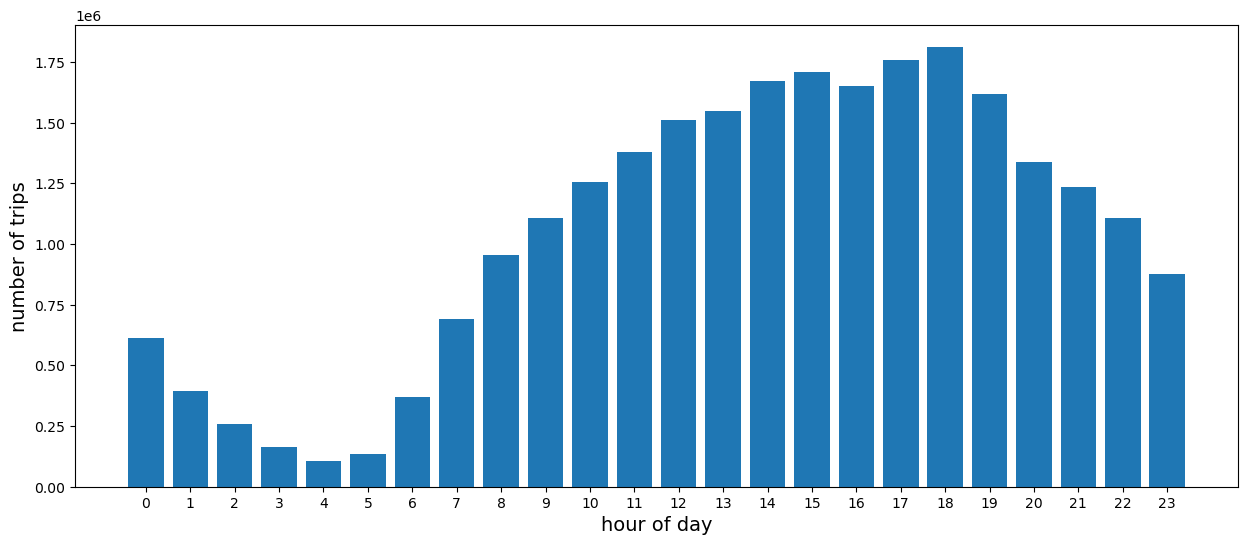

In [22]:
plt.figure(figsize=(15, 6))

plt.bar(tripsByHour.pickUpHour, tripsByHour.N_trips)
plt.xticks(tripsByHour.pickUpHour)
plt.ylabel('number of trips', fontsize=14)
plt.xlabel('hour of day', fontsize=14)

We can see that the trend of taxi trips starts from 4 am, which is the lowest of the day, and starts to go up. The trend peaks at 6 pm and decline after that. 

## Here we will have a look at the situation of the morning rush hour, i.e  7 am- 9 am

In [23]:
index1=(df.pickUpHour>6)&(df.pickUpHour<10)

In [24]:
dfmor=df[index1]

In [25]:
dfmor

tpep_pickup_datetime  passenger_count  trip_distance  PULocationID  \
4261833   2021-03-27 07:07:01              1.0           8.10           236   
4261834   2021-03-27 07:32:19              1.0           2.70           231   
4262873   2021-03-27 08:23:14              1.0           1.20            68   
4262874   2021-03-27 08:34:25              1.0           2.00            90   
4262875   2021-03-27 08:47:50              1.0           2.70           237   
...                       ...              ...            ...           ...   
30747171  2021-12-31 09:59:13              1.0           4.20           186   
30747228  2021-12-31 09:59:44              1.0           1.82           170   
30747249  2021-12-31 09:58:06              1.0           1.92           141   
30747426  2021-12-31 09:59:49              1.0           4.87           242   
30747484  2021-12-31 09:58:50              2.0           1.40            48   

          pickUpHour  
4261833            7  
4261834            7  
4262873            8  
4262874            8  
4262875            8  
...              ...  
30747171           9  
30747228           9  
30747249           9  
30747426           9  
30747484           9  

[2753048 rows x 5 columns]

In [26]:
dfmor.columns

Index(['tpep_pickup_datetime', 'passenger_count', 'trip_distance',
       'PULocationID', 'pickUpHour'],
      dtype='object')

In [27]:
dfmor=dfmor.groupby(by='PULocationID', as_index=False).agg({'pickUpHour':'count', 
                                                        'trip_distance': 'sum', 'passenger_count': 'sum'})

In [28]:
dfmor.rename(columns={'pickUpHour':'N_trips'}, inplace=True)

In [29]:
dfmor['ave_dis'] = dfmor.trip_distance/dfmor.N_trips

In [30]:
dfmor['ave_pas'] = dfmor.passenger_count/dfmor.N_trips

In [31]:
dfmor=dfmor[['PULocationID','ave_dis', 'ave_pas','N_trips']]

We get started from n=2 and use k-means clustering. Let's see what will happen.

In [32]:
km = KMeans(random_state=234,n_clusters=2)
res1=km.fit(dfmor[['ave_dis','N_trips']])

print('Cluster assignments:',res1.labels_)
print('\nCluster centers:\n',res1.cluster_centers_)
print('\nSum of squared errors:',res1.inertia_)

Cluster assignments: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0]

Cluster centers:
 [[5.69339633e+00 1.90899115e+03]
 [3.01520556e+00 7.25505000e+04]]

Sum of squared errors: 38198132369.17867


In [33]:
dfmor['cluster']=res1.labels_

In [34]:
res1=dfmor[['PULocationID','cluster']]

In [35]:
res1 = taxi.merge(res1, left_on='location_i', right_on='PULocationID')

In [36]:
res1['cluster'] = res1['cluster'].astype(str)

Text(0.5, 1.0, 'clusters by k-means')

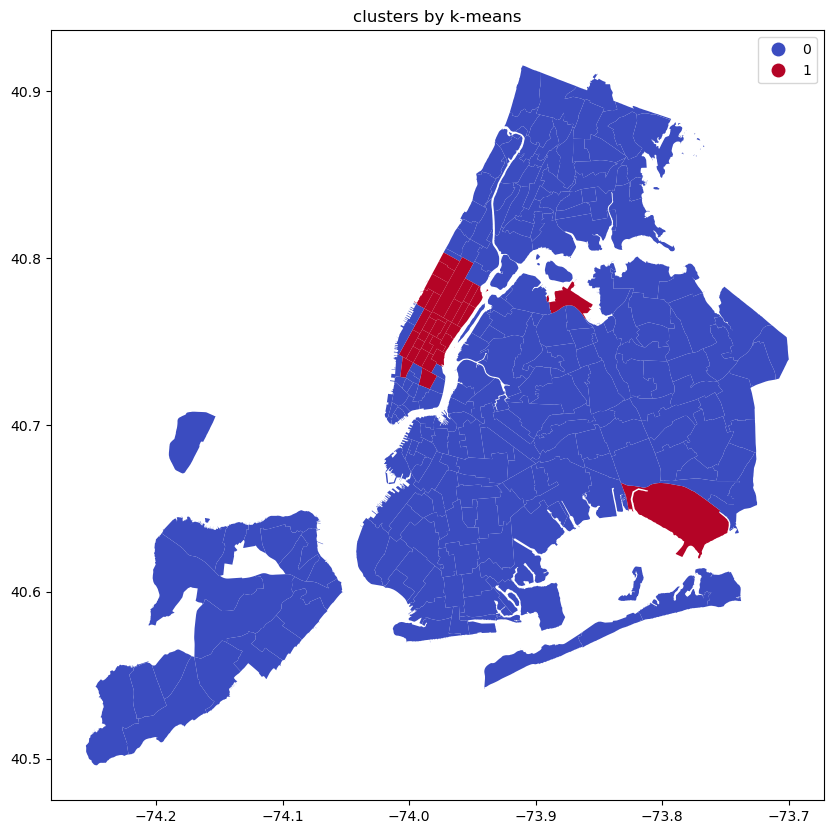

In [37]:
fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(20,10))
res1.plot(column='cluster',cmap='coolwarm', 
                                    legend=True,ax=ax)
plt.title('clusters by k-means')

### The k-means for the situation when n=2 performs really well. In the graph, we can see that the center place of Manhattan, airport of JFK and LaGuardia forms one cluster, and the other places of NYC form another cluster.

## Let's see what k-means perform in n>2.

In [38]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
from scipy.spatial.distance import cdist, pdist

In [39]:
def silhouette_score_plot(data,range_n_clusters):
    X=data
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(10, 5)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=324)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)

        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors)

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1],
                    marker='o', c="white", alpha=1, s=200)

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

        plt.show()

In [40]:
dfmor1=dfmor[['PULocationID', 'ave_dis', 'ave_pas']]

In [73]:
range_n_clusters = range(2,30)
for n_clusters in range_n_clusters: #try different numbers of clusters
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(dfmor[['ave_dis','N_trips']])
    #report average Silhouette score
    silhouette_avg = silhouette_score(dfmor[['ave_dis','N_trips']], cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.8874625350628897
For n_clusters =3, the average silhouette_score is :0.8888600760631226
For n_clusters =4, the average silhouette_score is :0.9002936726448316
For n_clusters =5, the average silhouette_score is :0.8713634359864693
For n_clusters =6, the average silhouette_score is :0.8645870865411377
For n_clusters =7, the average silhouette_score is :0.8625469939414233
For n_clusters =8, the average silhouette_score is :0.8621573132782759
For n_clusters =9, the average silhouette_score is :0.8523073352577547
For n_clusters =10, the average silhouette_score is :0.8491442318138223
For n_clusters =11, the average silhouette_score is :0.8546305515042294
For n_clusters =12, the average silhouette_score is :0.8511019847689248
For n_clusters =13, the average silhouette_score is :0.8459933692931346
For n_clusters =14, the average silhouette_score is :0.8531502245976769
For n_clusters =15, the average silhouette_score is :0.8339134256084805


In [42]:
def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

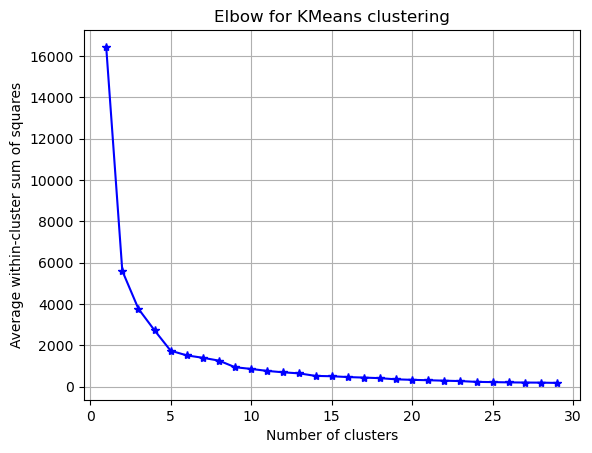

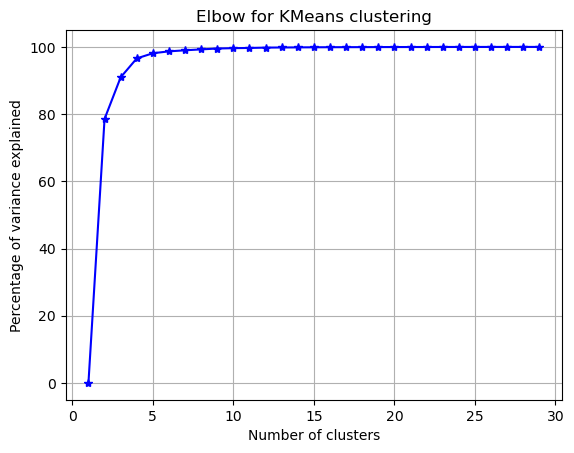

In [43]:
elbow(dfmor[['ave_dis','N_trips']], range(1,30))

## from the elbow theorem, we can say that the best performance of k-means in this situation is in range(3,6)


Cluster centers:
 [[5.69339633e+00 1.90899115e+03]
 [3.01520556e+00 7.25505000e+04]]

Sum of squared errors: 38198132369.17867

Cluster centers:
 [[5.74870668e+00 1.37212613e+03]
 [3.20878592e+00 1.00631857e+05]
 [2.82083014e+00 4.72540909e+04]]

Sum of squared errors: 16138497948.082691

Cluster centers:
 [[5.76341110e+00 1.27349321e+03]
 [3.36559677e+00 8.46266923e+04]
 [2.84239230e+00 4.38908571e+04]
 [2.01243342e+00 1.49917000e+05]]

Sum of squared errors: 6116042832.436445

Cluster centers:
 [[3.16447558e+00 1.43518125e+04]
 [3.36559677e+00 8.46266923e+04]
 [5.93235883e+00 4.80811594e+02]
 [2.88285280e+00 4.59996316e+04]
 [2.01243342e+00 1.49917000e+05]]

Sum of squared errors: 3382208800.6806626

Cluster centers:
 [[5.92554232e+00 5.15000000e+02]
 [2.01243342e+00 1.49917000e+05]
 [3.33962872e+00 5.85081111e+04]
 [3.53506387e+00 8.71904545e+04]
 [2.46538336e+00 4.07060000e+04]
 [3.07447241e+00 1.48024667e+04]]

Sum of squared errors: 2372489111.1878595

Cluster centers:
 [[5.9323

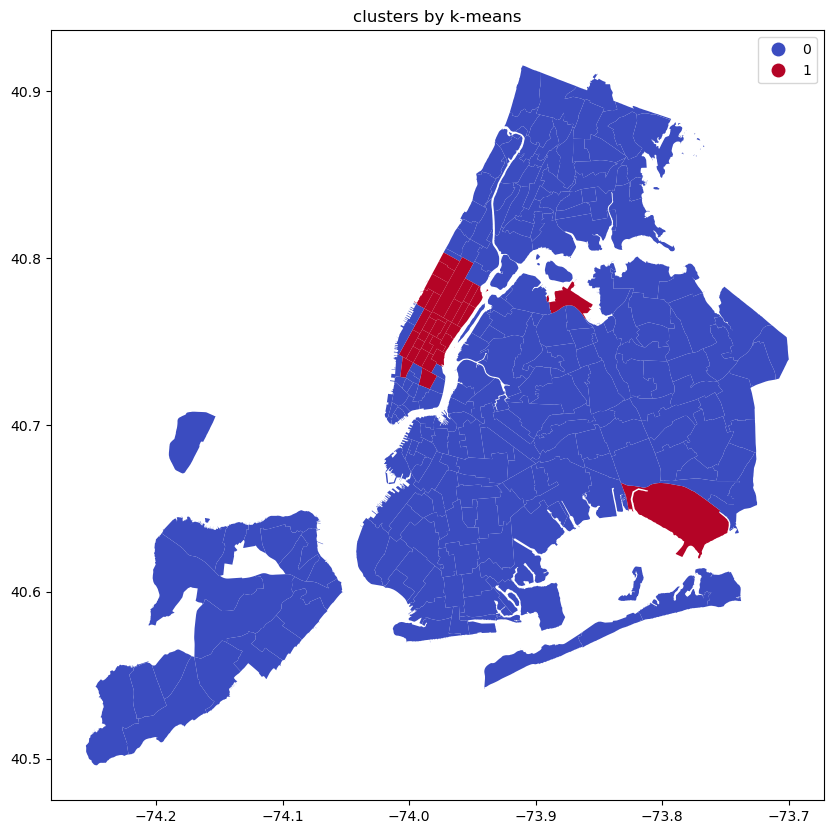

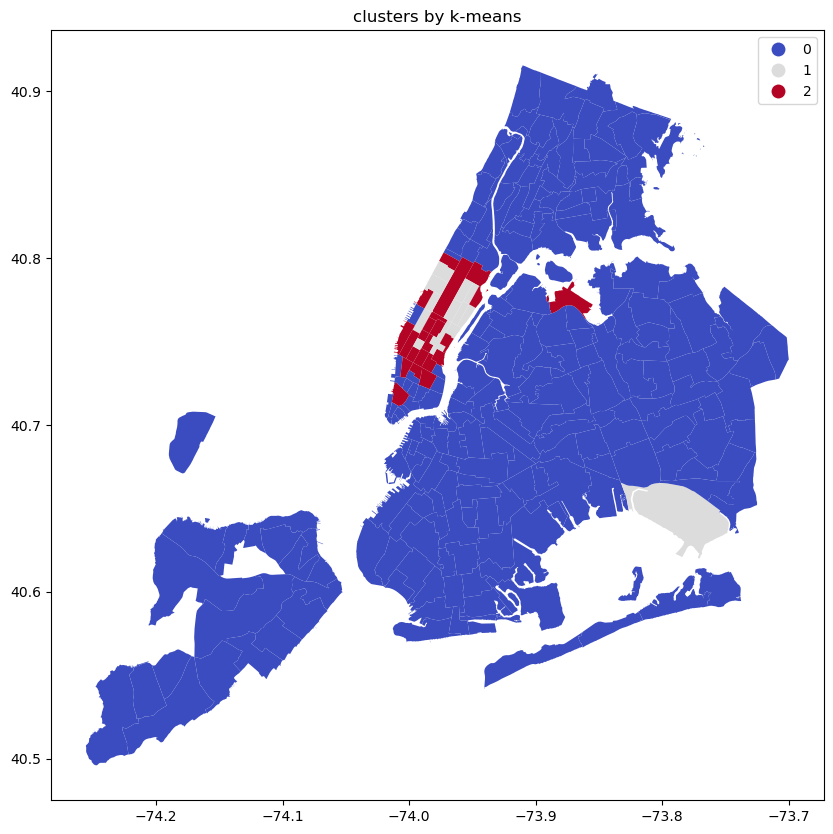

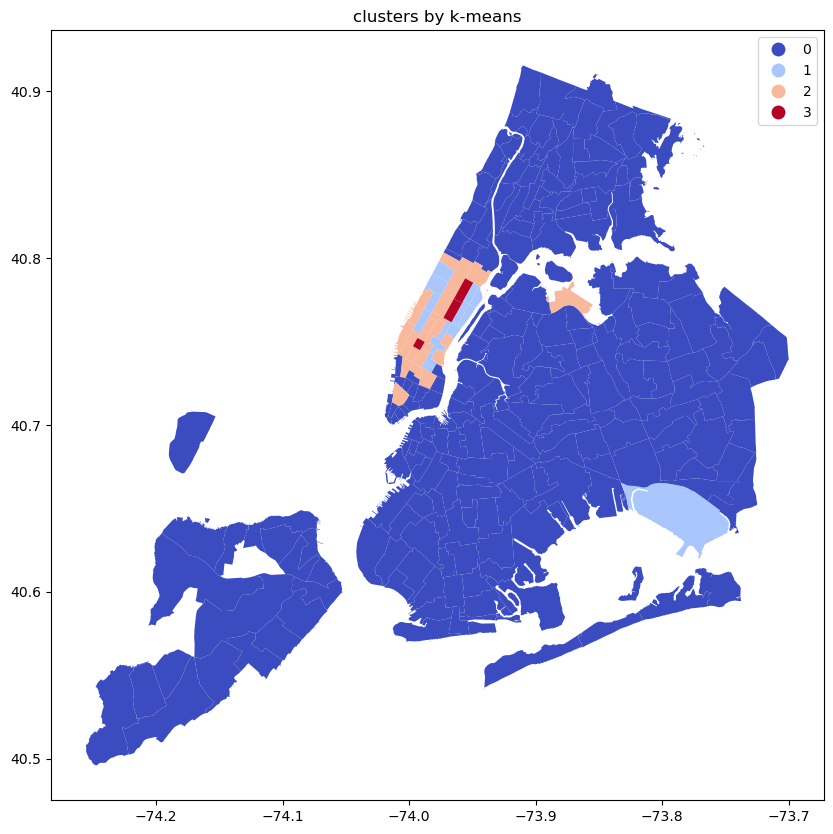

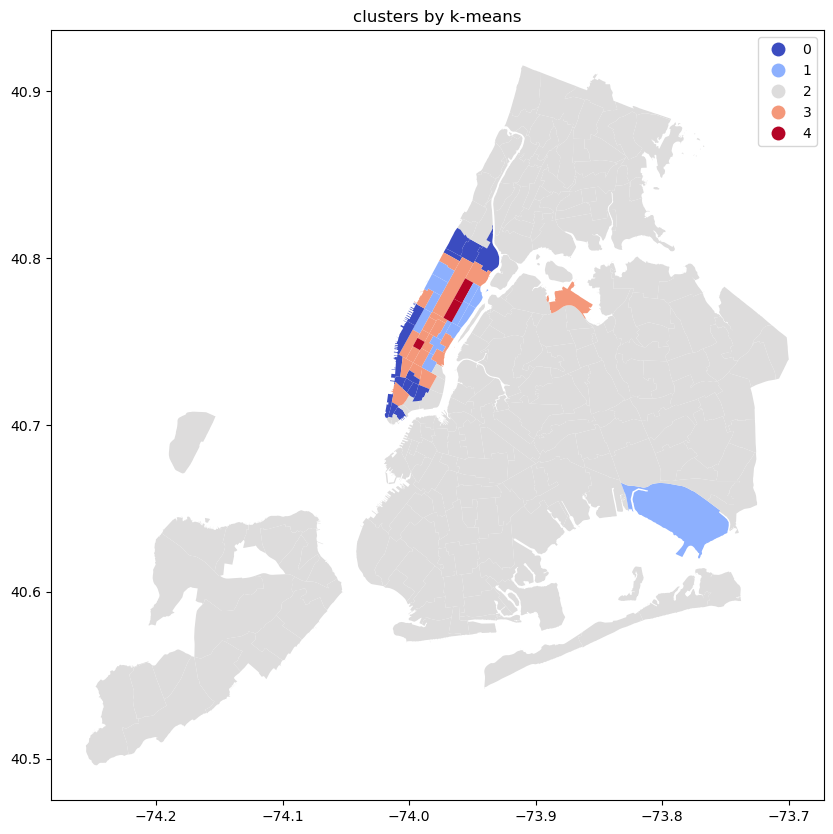

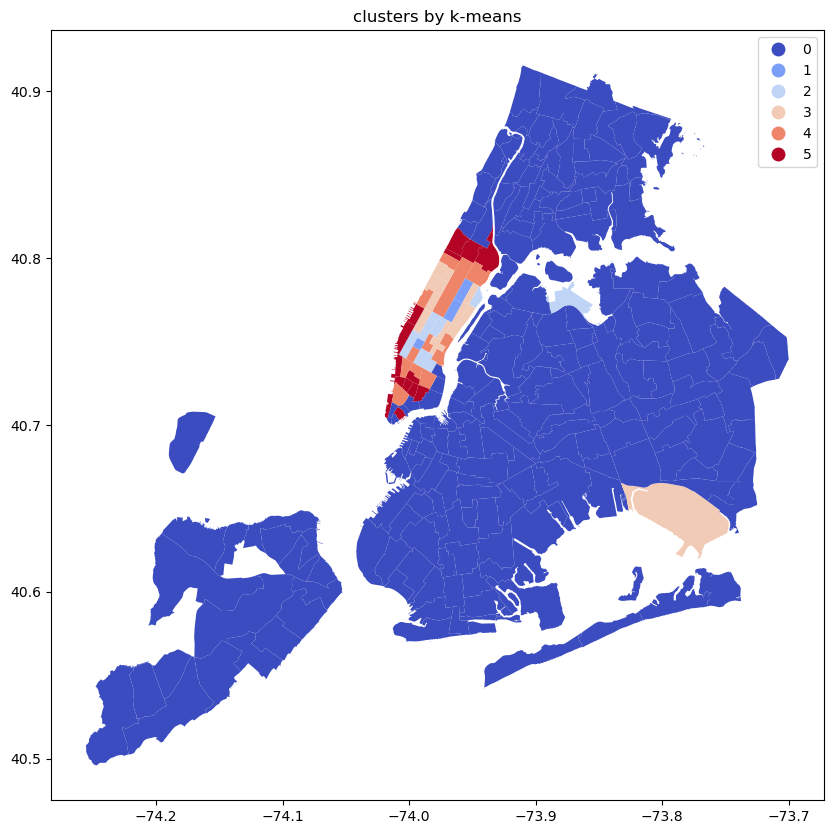

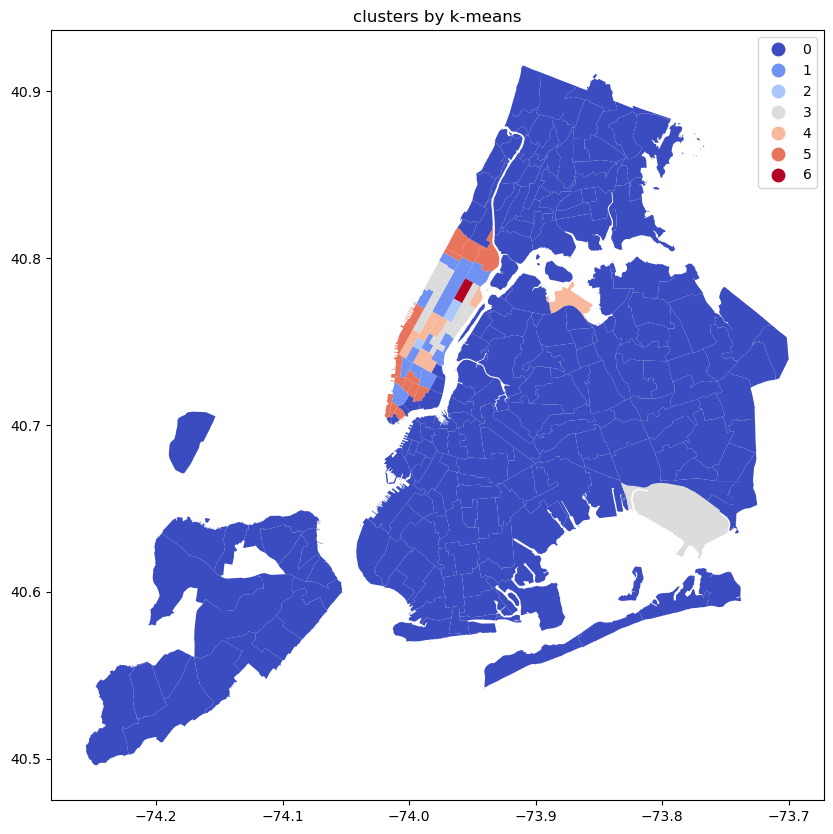

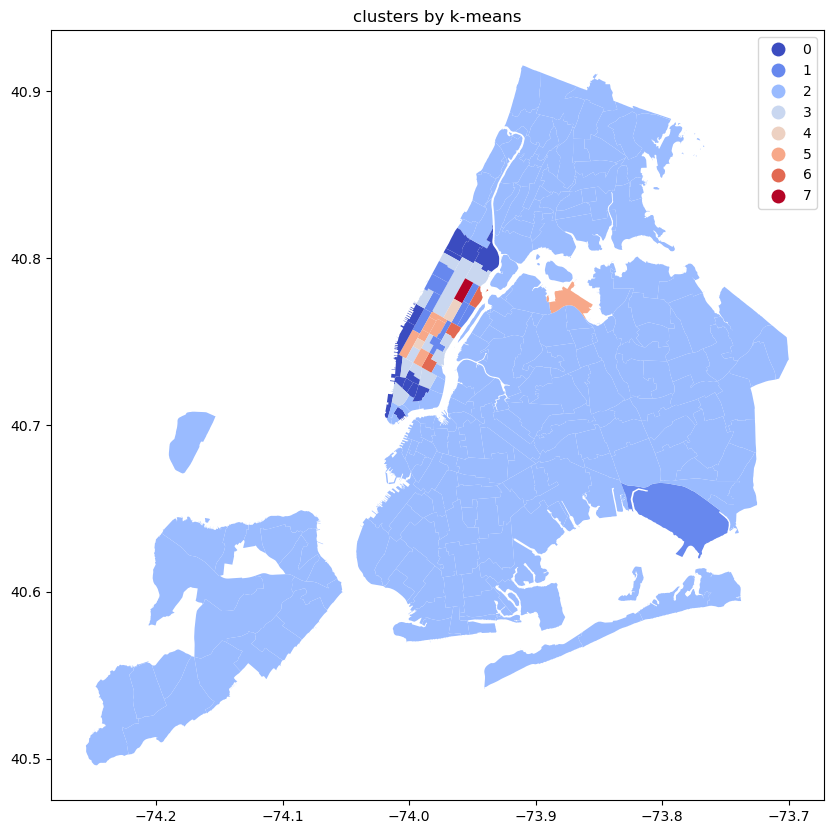

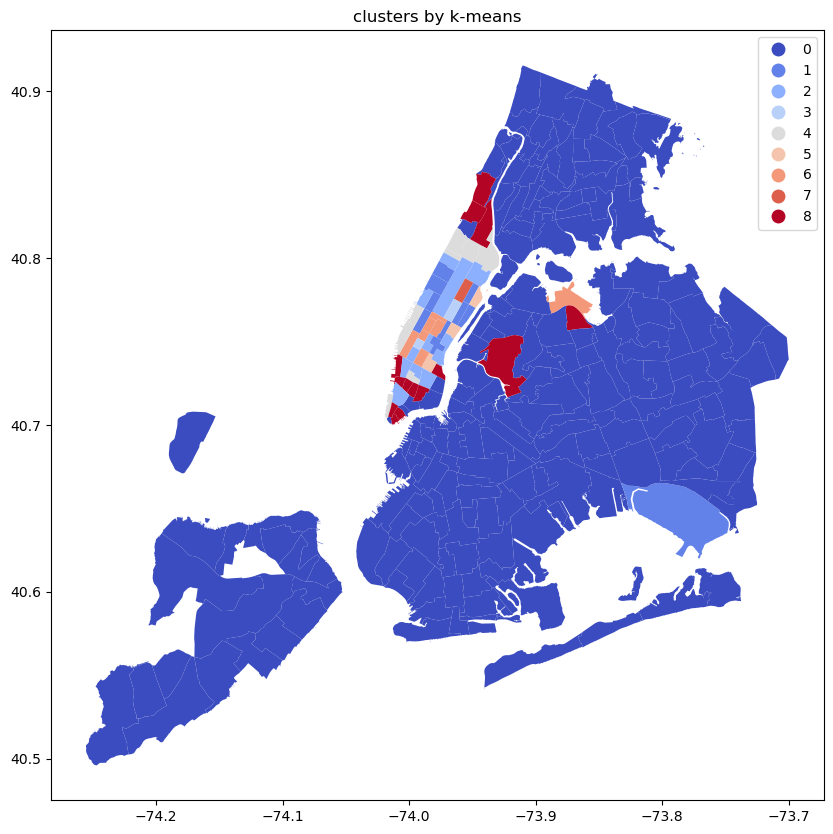

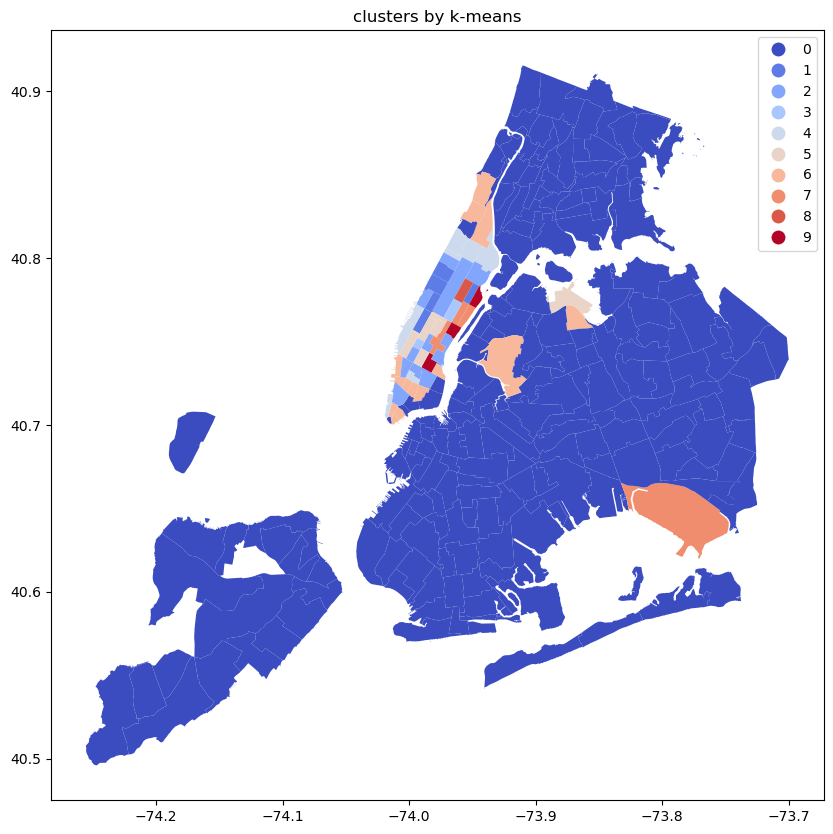

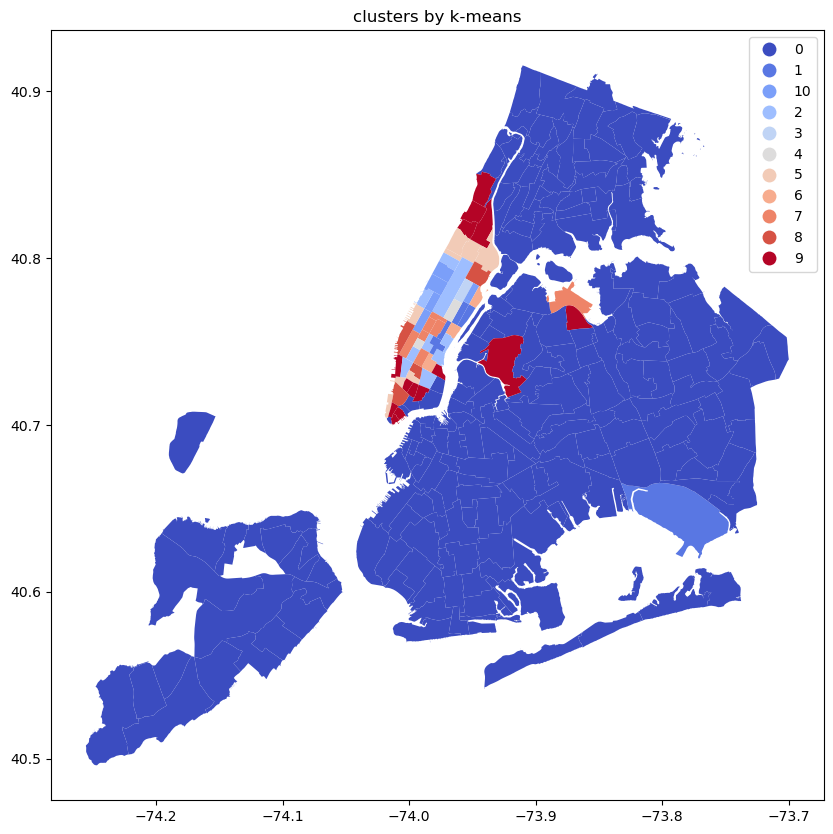

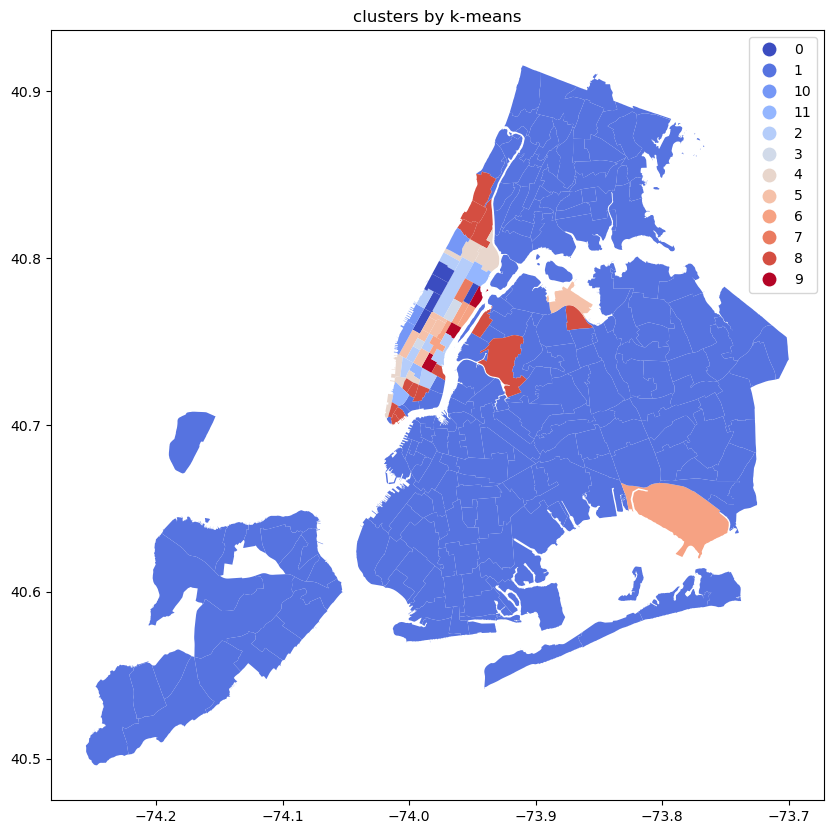

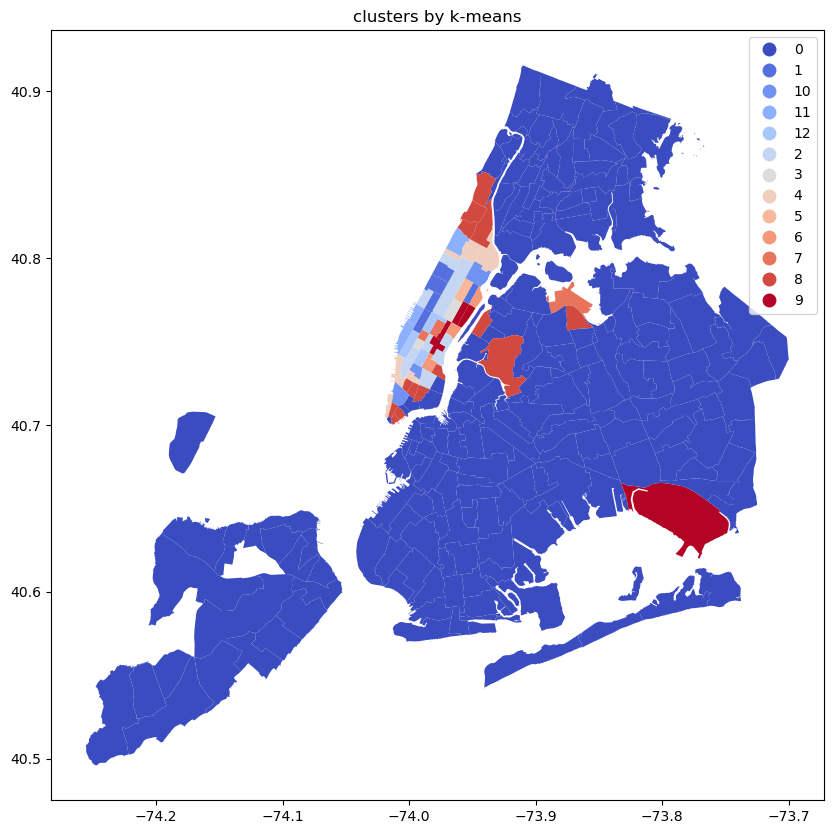

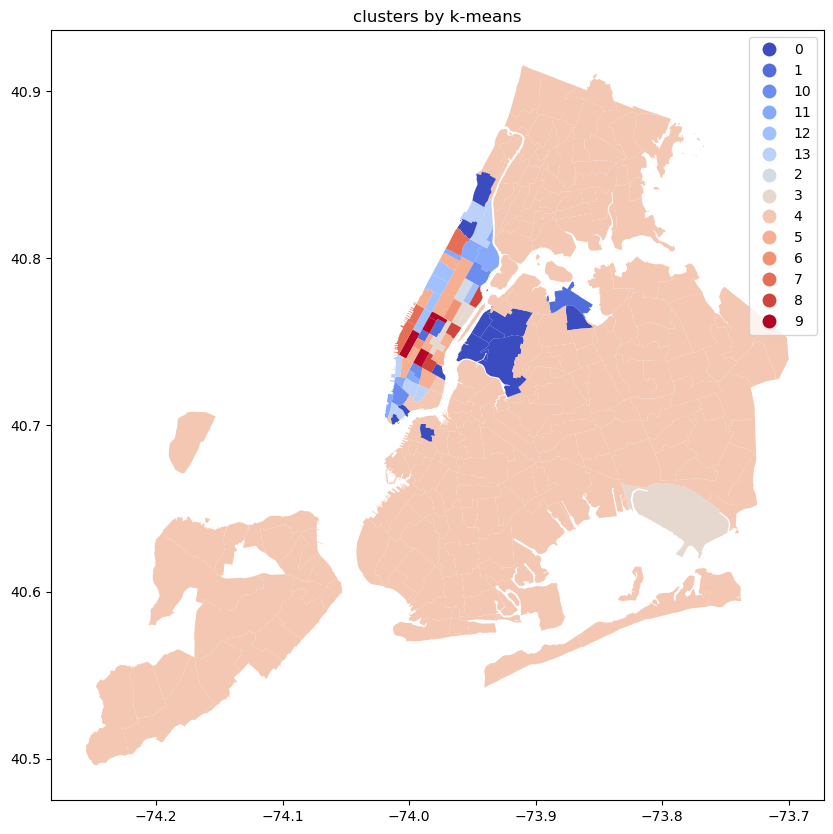

In [76]:
for i in range(13):
    dfmorning=dfmor
    km = KMeans(n_clusters=i+2)
    km=km.fit(dfmorning[['ave_dis','N_trips']])
    dfmorning['cluster']=km.labels_
    dfmorning = taxi.merge(dfmorning, left_on='location_i', right_on='PULocationID')
    dfmorning['cluster'] = dfmorning['cluster'].astype(str)
    
    fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(20,10))
    dfmorning.plot(column='cluster',cmap='coolwarm', 
                                          legend=True,ax=ax)
    plt.title('clusters by k-means')
    #print('Cluster assignments:',km.labels_)
    print('\nCluster centers:\n',km.cluster_centers_)
    print('\nSum of squared errors:',km.inertia_)

### We can see that all the other parts of NYC (exclude JFK, LaGuardia and Manhattan) always share a cluster. Adding new clusters to the model highly probibly assign the cluster to some places in Manhattan.

This is probabily because there is different features shared by the zipcode in Manhattan, indicating that the total trips per zipcode in Manhattan has a large variety of different average trip distances and trips count total.

#### from k-means, we can see the centers of each cluster, and in this case, the center stands for (average trip distance, total trips) . And also the higher we get on total trips the lower we may get on the average trip distances.
#### this is the center of n=7, cluster n=0 has the highest average trip distance but have the lowest trip count. cluster n=4 and n= 6 are the top two with highest trips count but have the lowest travel distance.

In [ ]:
#center of n=7 [[5.93235883e+00,4.80811594e+02]
 #[3.53506387e+00 8.71904545e+04]
# [2.46538336e+00 4.07060000e+04]
# [2.20024381e+00 1.69228000e+05]
 #[3.16447558e+00 1.43518125e+04]
# [1.91852823e+00 1.40261500e+05]
# [3.33962872e+00 5.85081111e+04]]

Now let's see how Gausssian Mixture perform.

In [66]:
from sklearn.mixture import GaussianMixture

range_n_clusters = range(2,30)

maxscore = 0
max_n = 0
    
for n_clusters in range_n_clusters:
    Gaussian= GaussianMixture(n_clusters,random_state=100)
    Gaussian.fit(dfmor[['ave_dis','N_trips']])
    label=Gaussian.predict(dfmor[['ave_dis','N_trips']])
    silhouette_avg = silhouette_score(dfmor[['ave_dis','N_trips']], label)
    if silhouette_avg>maxscore:
        maxscore = silhouette_avg
        max_n = n_clusters
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is : {}".format(silhouette_avg))
    
print("the best cluster number is {},".format(max_n))
Gaussian= GaussianMixture(n_clusters)
Gaussian.fit(dfmor[['ave_dis','N_trips']])
label=Gaussian.predict(dfmor[['ave_dis','N_trips']])
dfmor['Gaussian_labels'] = label
for i in range(max_n):
     print("number of elements in  cluster {},".format(i+1)+
          'is :{}'.format(len(dfmor[dfmor['Gaussian_labels']==i])))

For n_clusters = 2, the average silhouette_score is : 0.5640178768665115
For n_clusters = 3, the average silhouette_score is : 0.5866738014461085
For n_clusters = 4, the average silhouette_score is : 0.5322404572966052
For n_clusters = 5, the average silhouette_score is : 0.6360497254431448
For n_clusters = 6, the average silhouette_score is : 0.5373113653993753
For n_clusters = 7, the average silhouette_score is : 0.6059074329456122
For n_clusters = 8, the average silhouette_score is : 0.604828785115369
For n_clusters = 9, the average silhouette_score is : 0.6524045178087183
For n_clusters = 10, the average silhouette_score is : 0.6713221263982218
For n_clusters = 11, the average silhouette_score is : 0.6954104243319532
For n_clusters = 12, the average silhouette_score is : 0.6997606927581321
For n_clusters = 13, the average silhouette_score is : 0.715660433293852
For n_clusters = 14, the average silhouette_score is : 0.6578669207594211
For n_clusters = 15, the average silhouette_scor

In [64]:
    # elbow curve
    #fig = plt.figure()
    #ax = fig.add_subplot(111)
    #ax.plot(K, avgWithinSS, 'b*-')
   #plt.grid(True)
    #plt.xlabel('Number of clusters')
    #plt.ylabel('Average within-cluster sum of squares')
    #plt.title('Elbow for GM clustering')
    #plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    #wcss = [sum(d**2) for d in dist]
    #tss = sum(pdist(data)**2)/data.shape[0]
    #bss = tss-wcss
    
    #fig = plt.figure()
    #ax = fig.add_subplot(111)
    #ax.plot(K, bss/tss*100, 'b*-')
    #plt.grid(True)
    #plt.xlabel('Number of clusters')
    #plt.ylabel('Percentage of variance explained')
    #plt.title('Elbow for GM clustering')
    #plt.show()

In [53]:
from sklearn.mixture import GaussianMixture
from scipy import linalg
import matplotlib as mpl
gmm = GaussianMixture(n_components=2,random_state=100)
res = gmm.fit(dfmor[['ave_dis','N_trips']])

#print('Probabilities of belonging to cluster 1:\n',res.predict_proba(dfmor1[['ave_dis','N_trips']])[:,1])
print('\nCluster centers:\n',res.means_)
print('\nCluster covariances:\n',res.covariances_)
print('\nLog-likelihood per sample:',res.score(dfmor[['ave_dis','N_trips']]))



Cluster centers:
 [[6.31960141e+00 1.15201021e+02]
 [3.31073684e+00 3.32544861e+04]]

Cluster covariances:
 [[[ 3.83364565e+01 -8.24083126e+01]
  [-8.24083126e+01  1.33770056e+04]]

 [[ 3.75843292e+00 -7.75109850e+03]
  [-7.75109850e+03  1.41854942e+09]]]

Log-likelihood per sample: -11.474669570029059



Cluster centers:
 [[6.31960141e+00 1.15201021e+02]
 [3.31073684e+00 3.32544861e+04]]

Log-likelihood per sample: -11.474669570029059

Cluster centers:
 [[6.34849662e+00 1.12233161e+02]
 [2.50158730e+00 5.10612658e+04]
 [4.37988717e+00 8.26203595e+03]]

Log-likelihood per sample: -11.16194249070676

Cluster centers:
 [[6.30241622e+00 1.07290039e+02]
 [3.06915830e+00 2.70168231e+04]
 [1.22732964e+01 4.08190722e+04]
 [2.01250024e+00 1.49938133e+05]]

Log-likelihood per sample: -11.138218990744093

Cluster centers:
 [[6.40059841e+00 1.00020130e+02]
 [3.29259023e+00 3.98871955e+04]
 [4.09566153e+00 8.86135724e+04]
 [2.01243404e+00 1.49917730e+05]
 [3.60776744e+00 3.54851242e+03]]

Log-likelihood per sample: -11.108739899602204

Cluster centers:
 [[6.43784384e+00 9.85743974e+01]
 [2.44966959e+00 4.88559323e+04]
 [1.54246410e+01 9.82180000e+04]
 [2.01189245e+00 1.50364503e+05]
 [3.65064821e+00 2.39264488e+03]
 [6.66648437e+00 2.48046534e+04]]

Log-likelihood per sample: -10.747351710213838



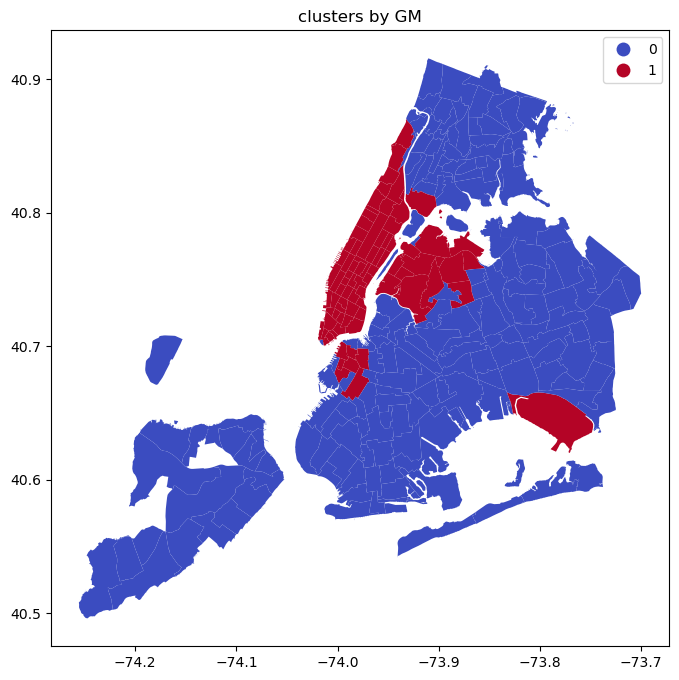

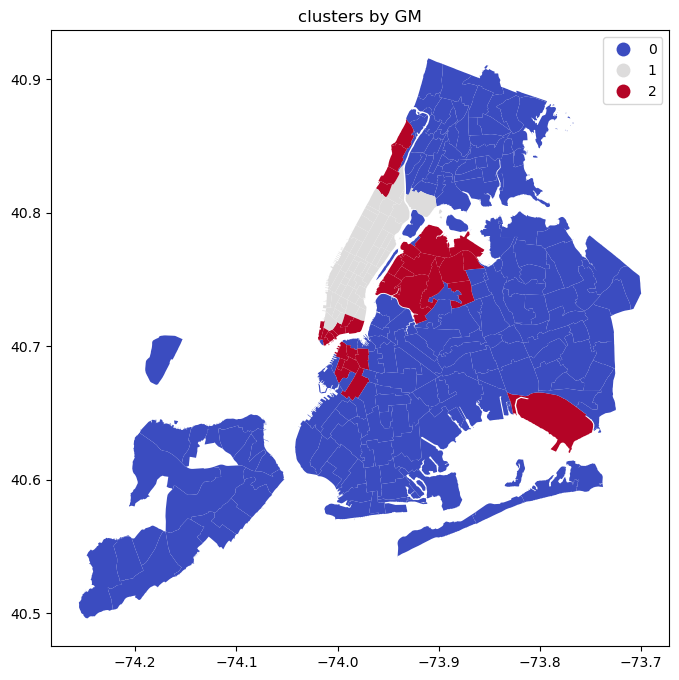

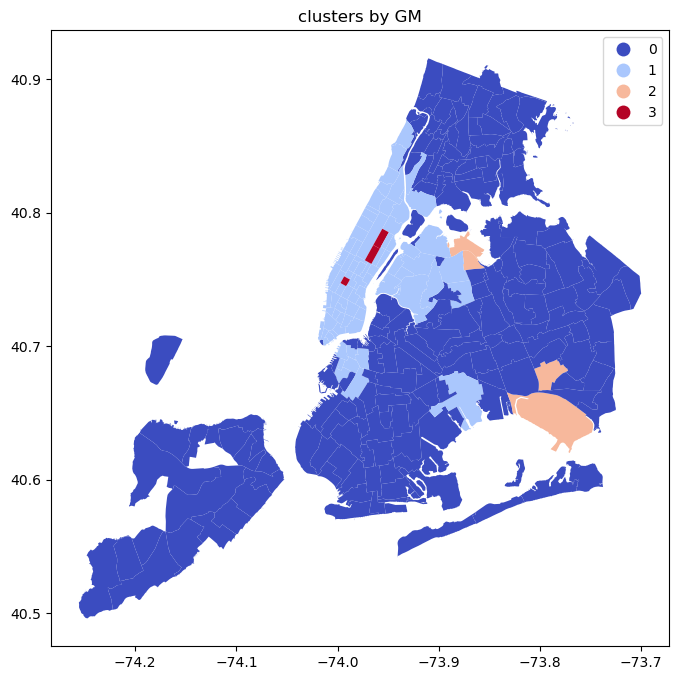

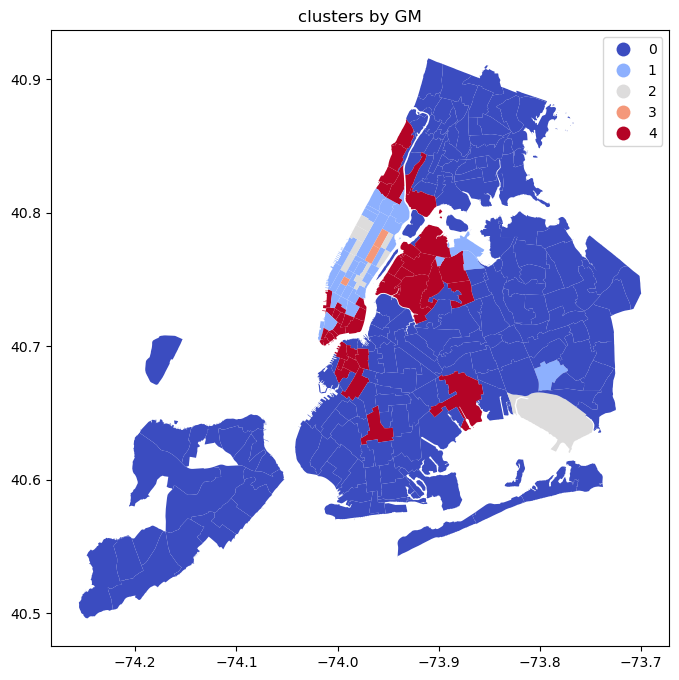

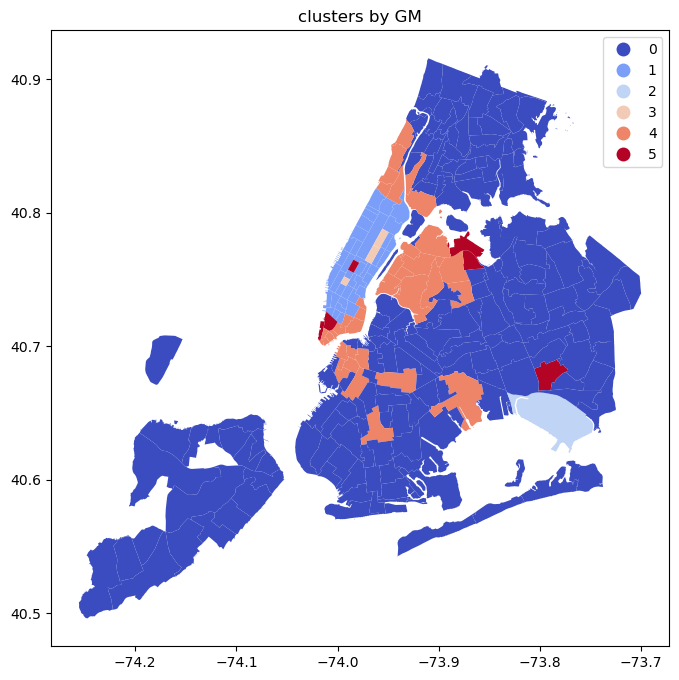

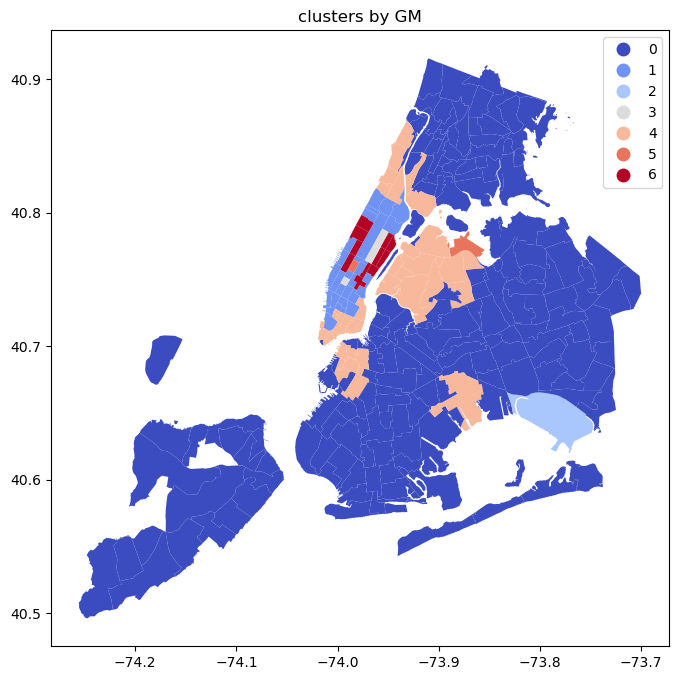

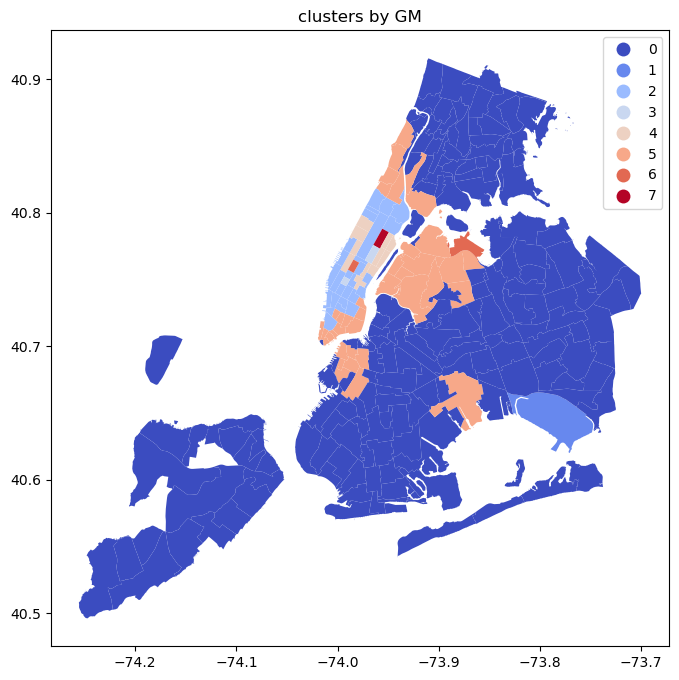

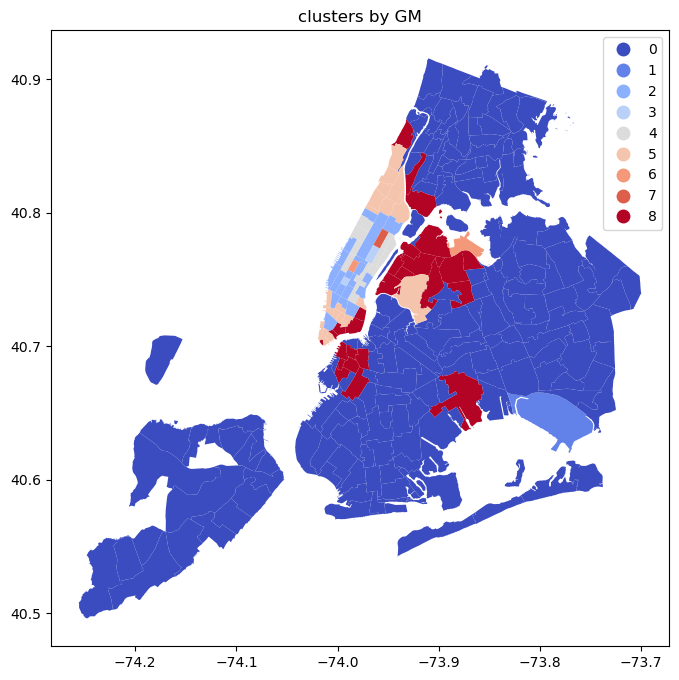

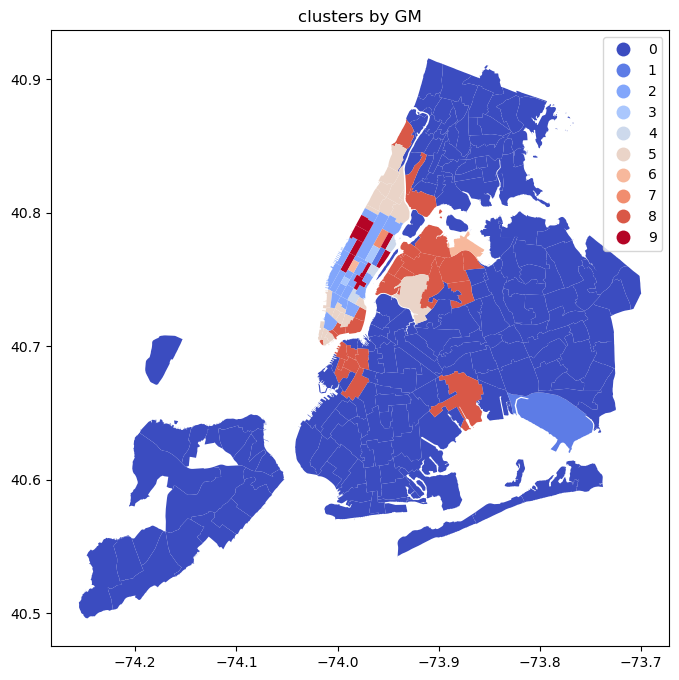

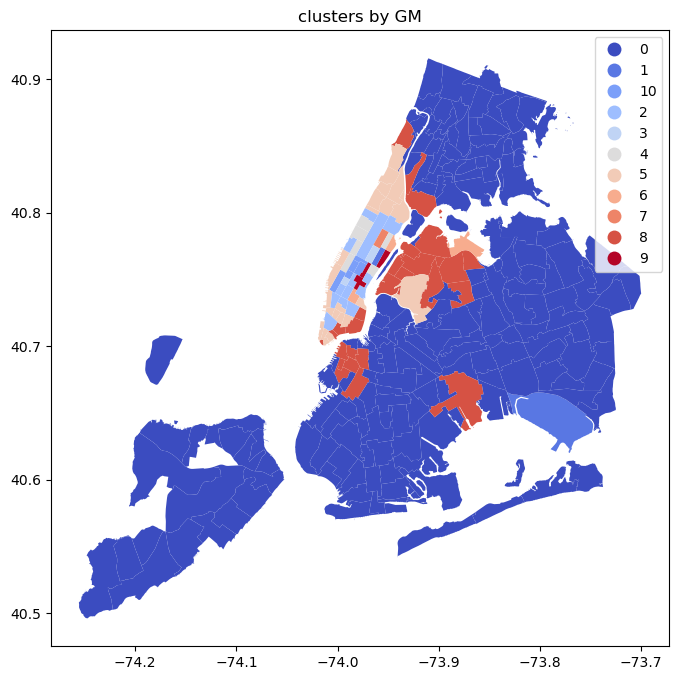

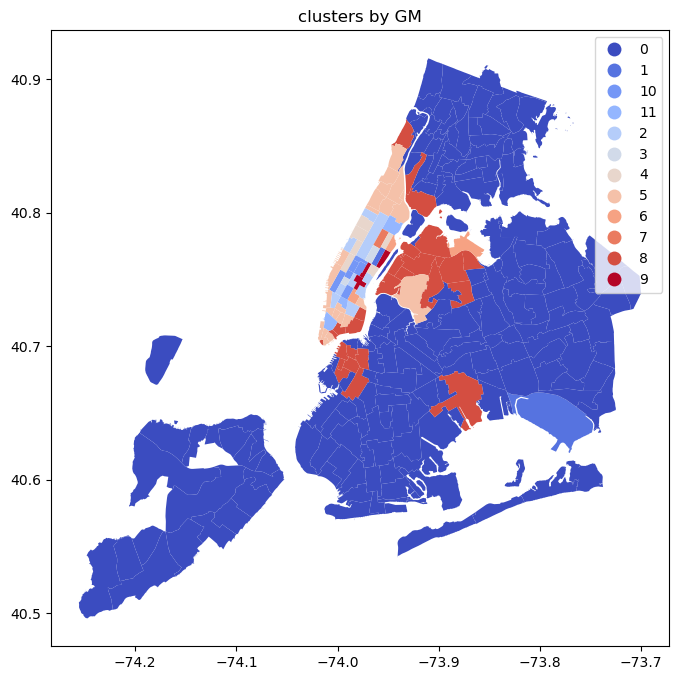

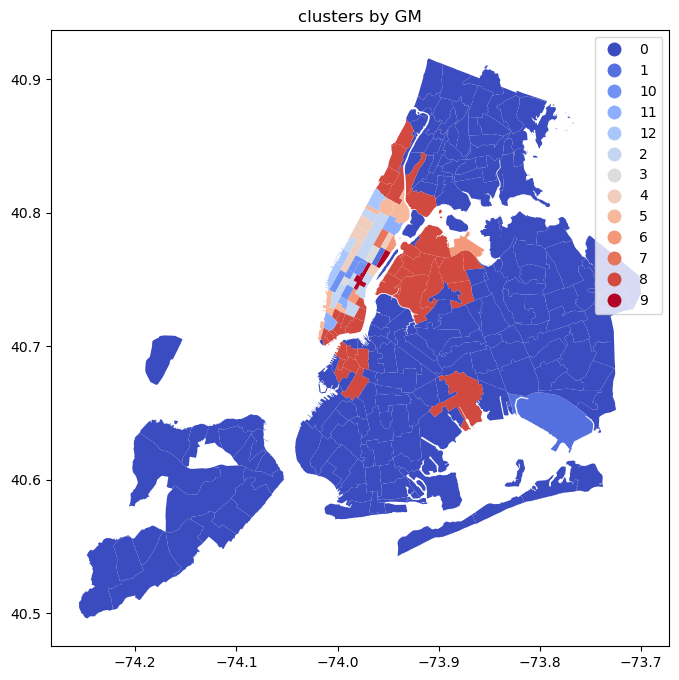

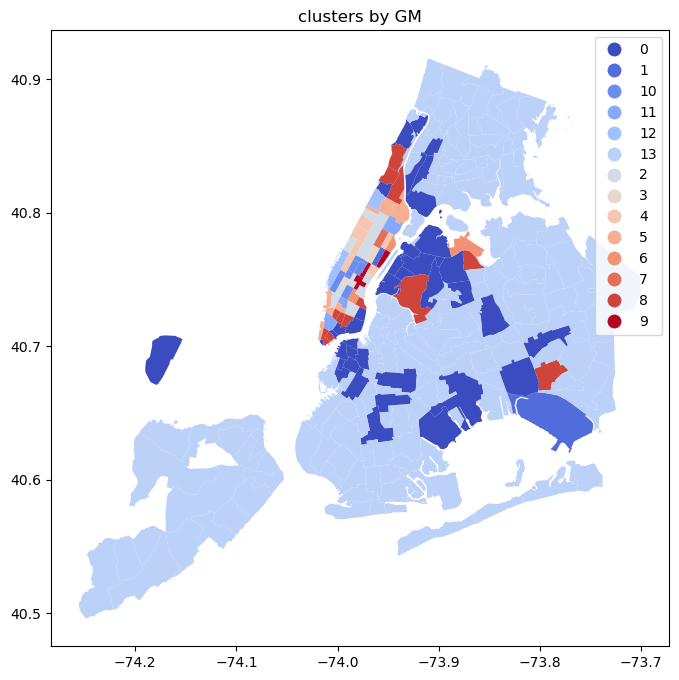

In [75]:
for i in range(13):
    dfmorning=dfmor
    gmm = GaussianMixture(n_components=i+2,random_state=100)
    res = gmm.fit(dfmor[['ave_dis','N_trips']])
    dfmorning['cluster']=gmm.predict(dfmor[['ave_dis','N_trips']])
    dfmorning = taxi.merge(dfmorning, left_on='location_i', right_on='PULocationID')
    dfmorning['cluster'] = dfmorning['cluster'].astype(str)
    
    fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(10,8))
    dfmorning.plot(column='cluster',cmap='coolwarm', 
                                          legend=True,ax=ax)
    plt.title('clusters by GM')
    #print('Cluster assignments:',km.labels_)
    print('\nCluster centers:\n',res.means_)
    print('\nLog-likelihood per sample:',res.score(dfmor[['ave_dis','N_trips']]))

for Gaussian Mixture, some areas in Queens and Brooklyn are assigned to groups in Manhattan. But also, significantly, we can see that in Gaussian Mixture model, the neighbor zipcode tends to form in the same cluster. However, through visualization, we can see a strong bond in Manhattan, JFK and LaGuardia, which is the same with the answer we got in K-means.

## for rush hour in the evening

In [77]:
index2=(df.pickUpHour>16)&(df.pickUpHour<20)

In [78]:
dfeve=df[index2]

In [79]:
dfeve=dfeve.groupby(by='PULocationID', as_index=False).agg({'pickUpHour':'count', 
                                                        'trip_distance': 'sum', 'passenger_count': 'sum'})

In [80]:
dfeve.rename(columns={'pickUpHour':'N_trips'}, inplace=True)

In [81]:
dfeve['ave_dis'] = dfeve.trip_distance/dfeve.N_trips

In [82]:
dfeve['ave_pas'] = dfeve.passenger_count/dfeve.N_trips

In [83]:
dfeve=dfeve[['PULocationID','ave_dis', 'ave_pas','N_trips']]

In [84]:
dfeve1=dfeve[['PULocationID', 'ave_dis', 'N_trips']]


Cluster centers:
 [[5.87656113e+00 4.00919214e+03]
 [2.84650936e+00 1.37855065e+05]]

Sum of squared errors: 105777408334.91211

Cluster centers:
 [[2.57799669e+00 9.47440000e+04]
 [3.14861399e+00 1.84908385e+05]
 [5.95423386e+00 2.71737054e+03]]

Sum of squared errors: 45986585385.0898

Cluster centers:
 [[6.09248319e+00 1.13725701e+03]
 [2.64505586e+00 1.13860176e+05]
 [3.32564903e+00 1.91871364e+05]
 [2.70193320e+00 5.01128333e+04]]

Sum of squared errors: 27751545528.004215

Cluster centers:
 [[2.70193320e+00 5.01128333e+04]
 [6.09248319e+00 1.13725701e+03]
 [3.49630807e+00 1.66368800e+05]
 [1.98963372e+00 2.46707000e+05]
 [2.70774047e+00 1.09493267e+05]]

Sum of squared errors: 13892304544.022802

Cluster centers:
 [[6.17381527e+00 6.72626794e+02]
 [2.76752810e+00 1.13173769e+05]
 [1.98963372e+00 2.46707000e+05]
 [2.33160584e+00 7.07853000e+04]
 [3.49630807e+00 1.66368800e+05]
 [2.89473286e+00 3.12074667e+04]]

Sum of squared errors: 7887382633.600287

Cluster centers:
 [[6.17381

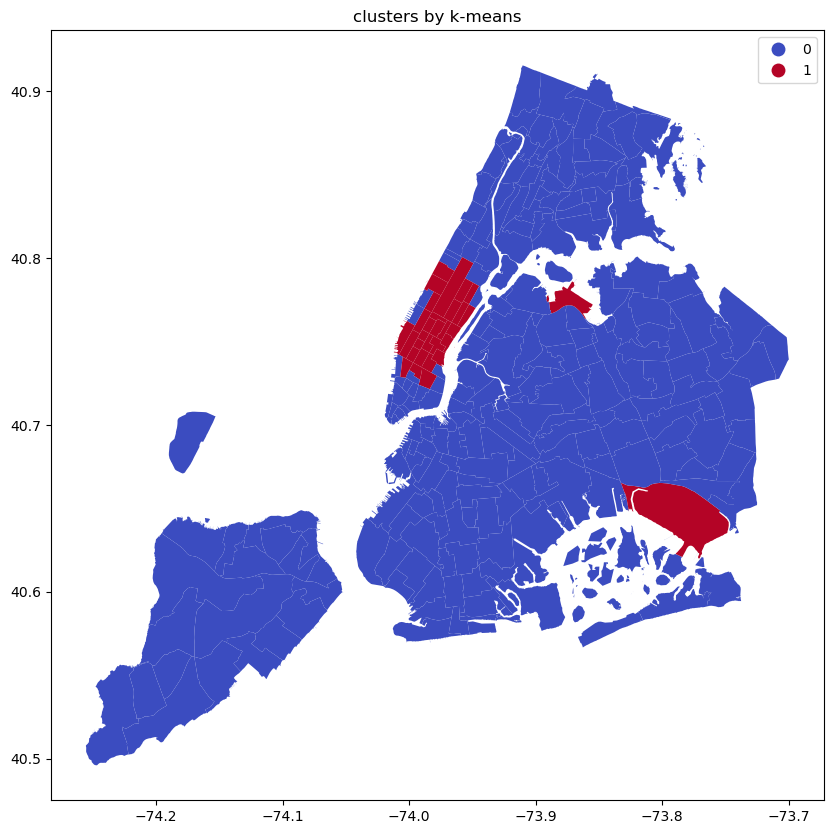

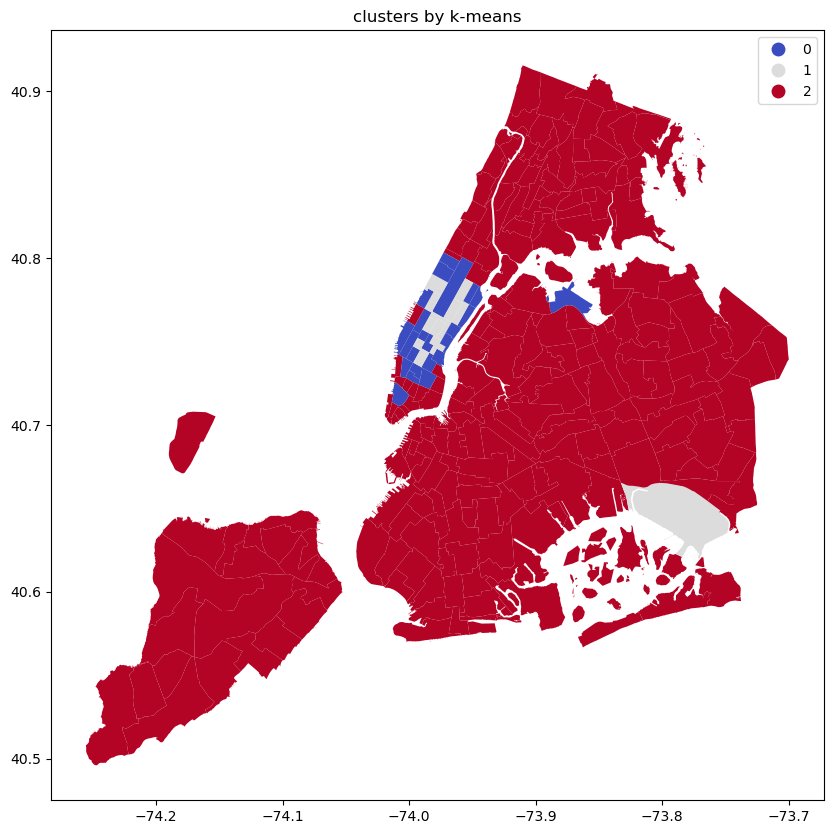

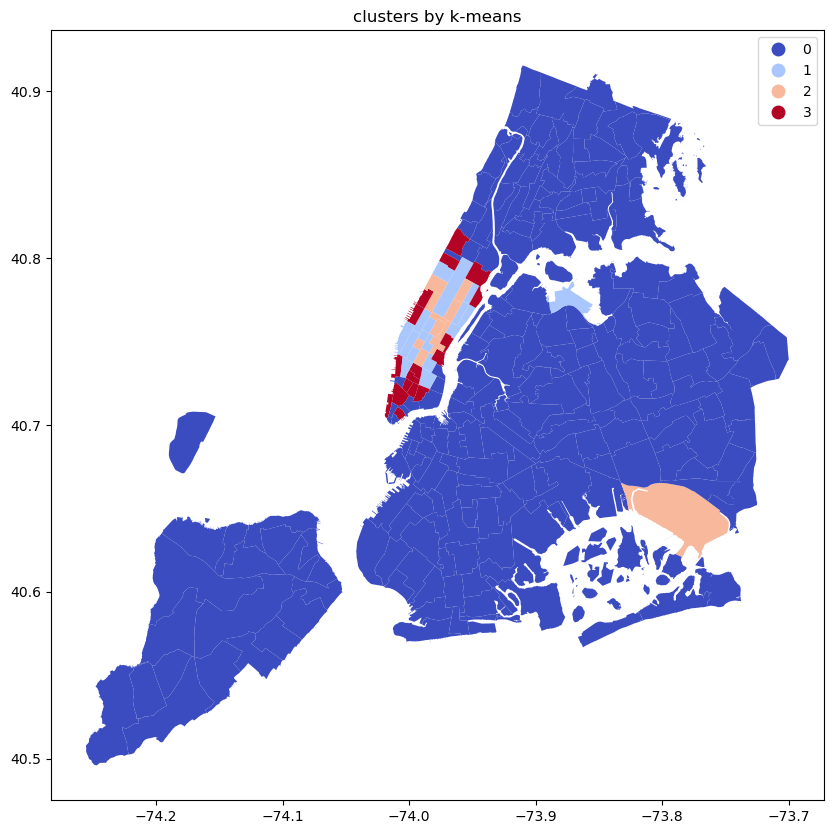

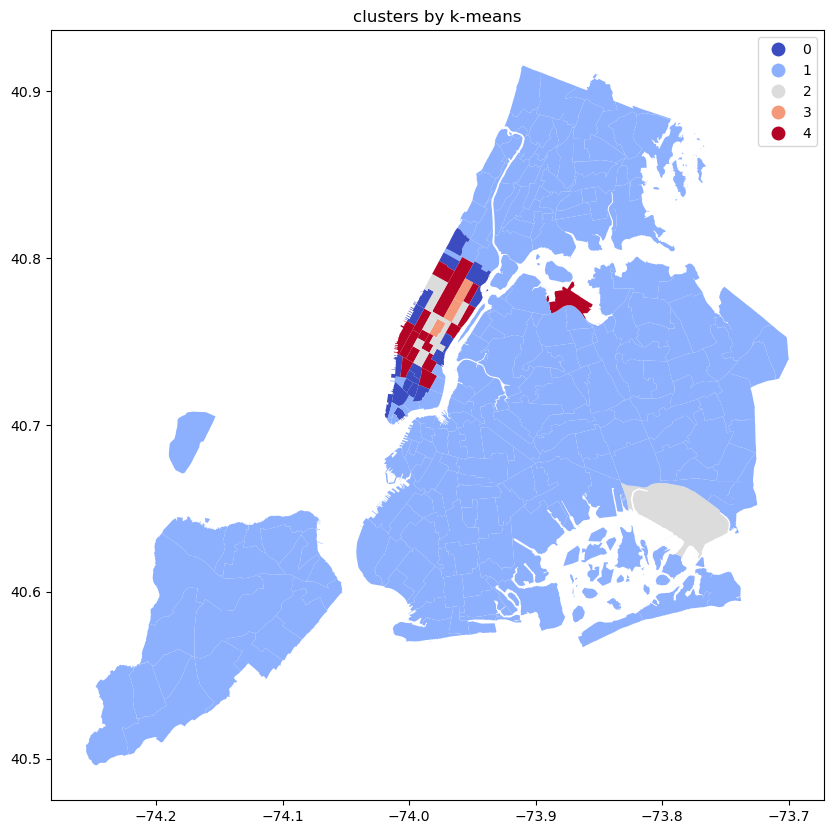

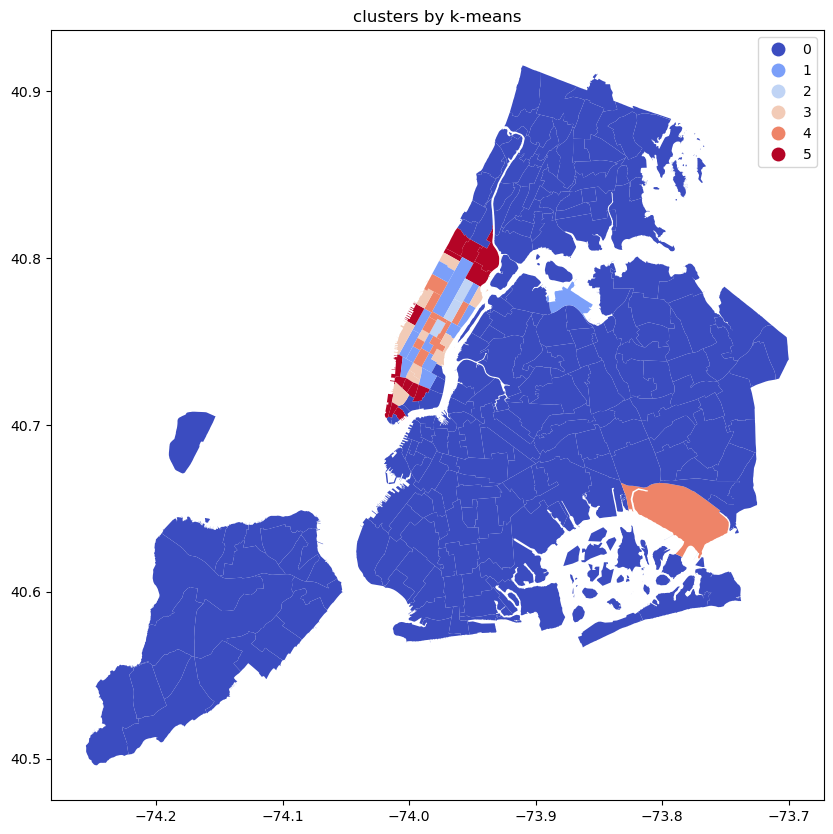

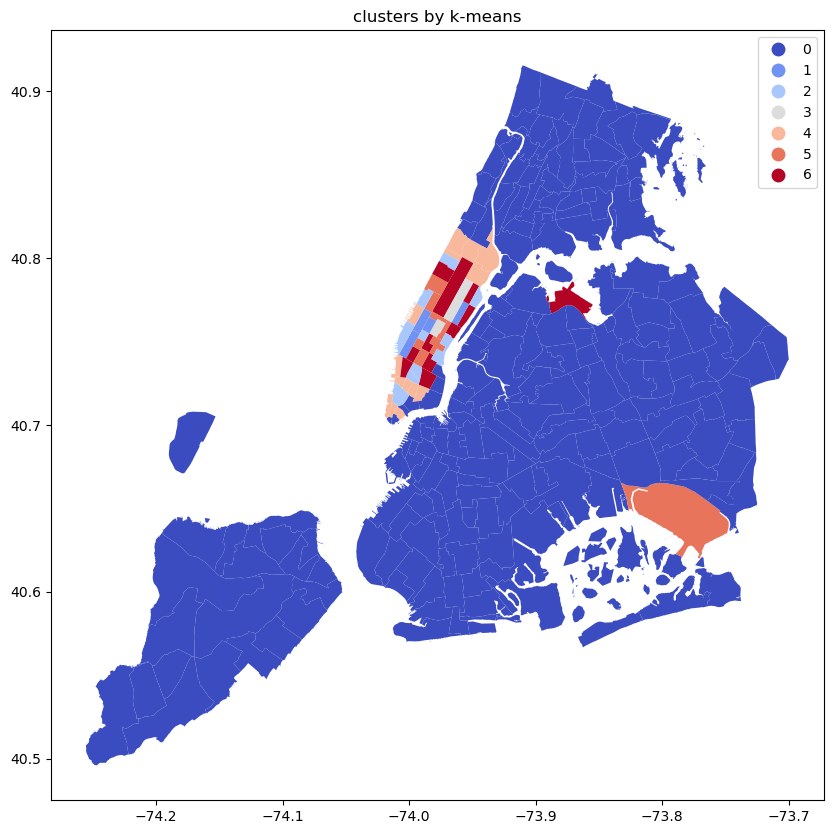

In [85]:
for i in range(6):
    dfevening=dfeve1
    km = KMeans(n_clusters=i+2)
    km=km.fit(dfevening[['ave_dis','N_trips']])
    dfevening['cluster']=km.labels_
    dfevening = taxi.merge(dfevening, left_on='location_i', right_on='PULocationID')
    dfevening['cluster'] = dfevening['cluster'].astype(str)
    
    fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(20,10))
    dfevening.plot(column='cluster',cmap='coolwarm', 
                                          legend=True,ax=ax)
    plt.title('clusters by k-means')
    #print('Cluster assignments:',km.labels_)
    print('\nCluster centers:\n',km.cluster_centers_)
    print('\nSum of squared errors:',km.inertia_)

## The result is nearly the same with the rush hour in the morning.
Let's use Gaussian Mixture.


Cluster centers:
 [[6.77543514e+00 8.42618015e+01]
 [3.28352689e+00 5.51819158e+04]]

Log-likelihood per sample: -11.977330558592778

Cluster centers:
 [[6.87853649e+00 7.71803091e+01]
 [2.28004753e+00 9.28452557e+04]
 [4.25133233e+00 1.31379821e+04]]

Log-likelihood per sample: -11.555344372038121

Cluster centers:
 [[7.34705270e+00 6.10753461e+01]
 [3.46194400e+00 9.15728691e+02]
 [6.58541284e+00 3.49794960e+04]
 [2.26118340e+00 9.70801485e+04]]

Log-likelihood per sample: -11.095632725809029

Cluster centers:
 [[7.34920436e+00 6.06479717e+01]
 [3.46109568e+00 9.08356922e+02]
 [9.03704030e+00 1.72652869e+05]
 [5.91509676e+00 2.50820324e+04]
 [2.25414209e+00 9.64668198e+04]]

Log-likelihood per sample: -11.014912229709529

Cluster centers:
 [[6.94406015e+00 7.42437758e+01]
 [2.38390351e+00 6.14208326e+04]
 [9.03327156e+00 1.72647976e+05]
 [9.59455675e+00 1.17373000e+05]
 [2.11152745e+00 1.55607939e+05]
 [3.83099874e+00 5.19002562e+03]]

Log-likelihood per sample: -11.196312636331283


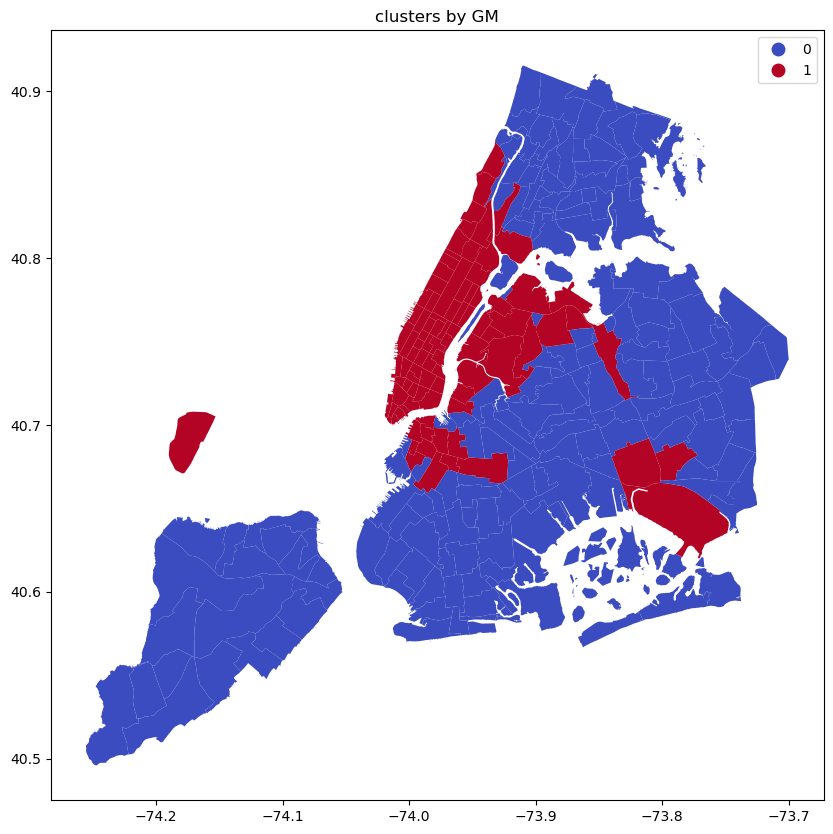

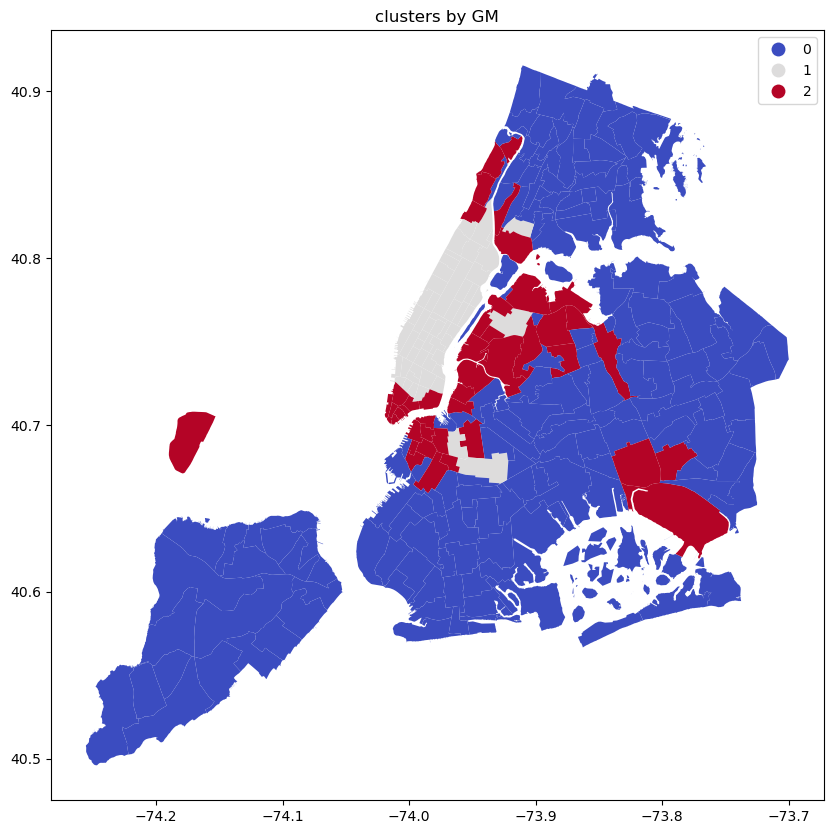

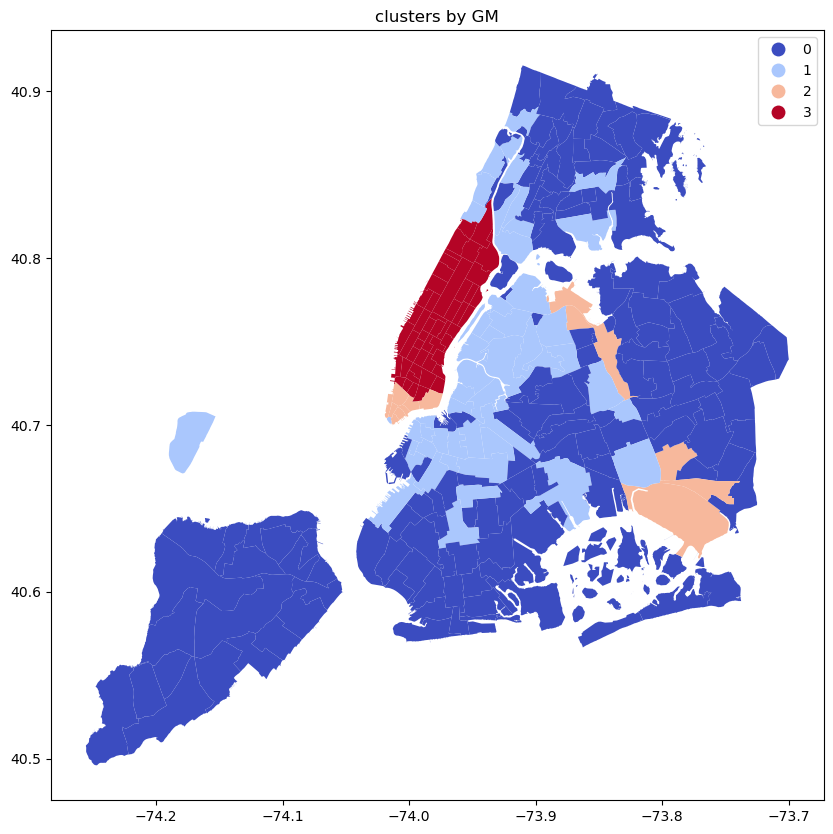

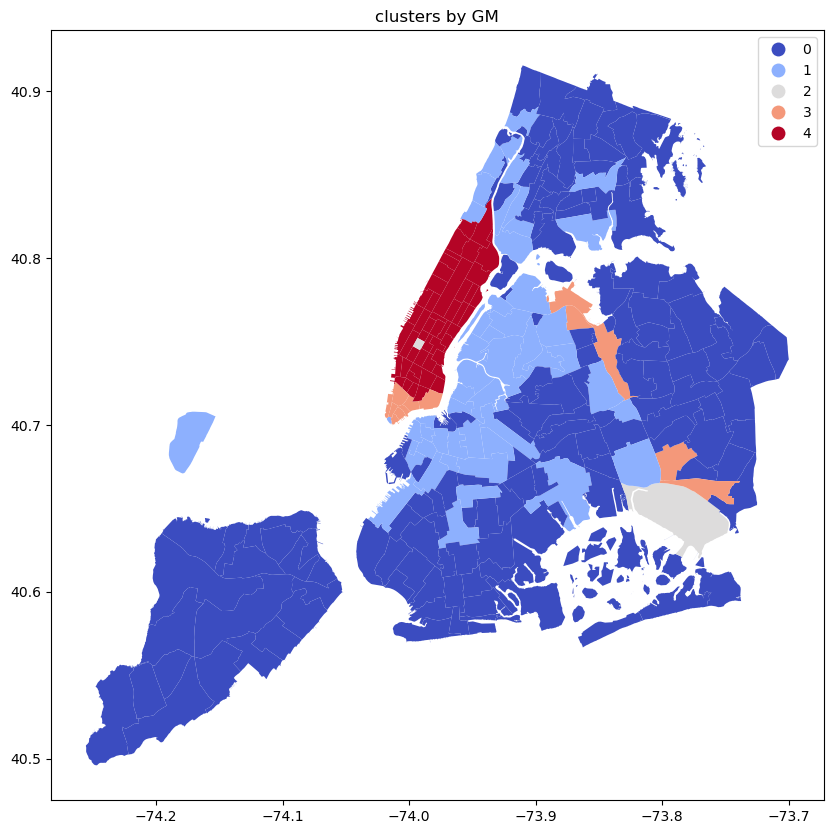

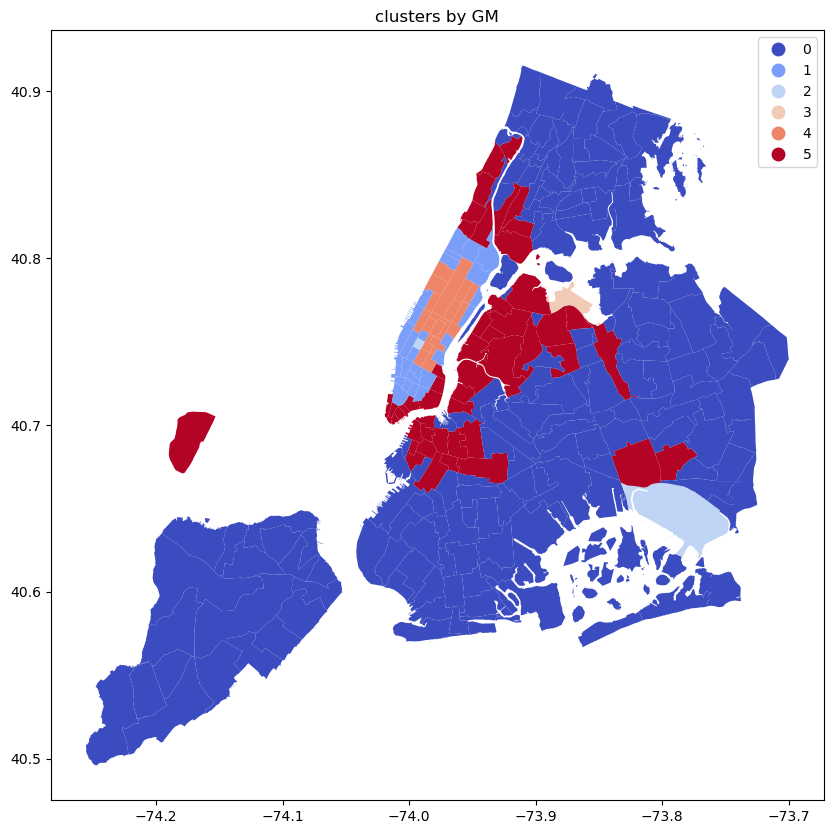

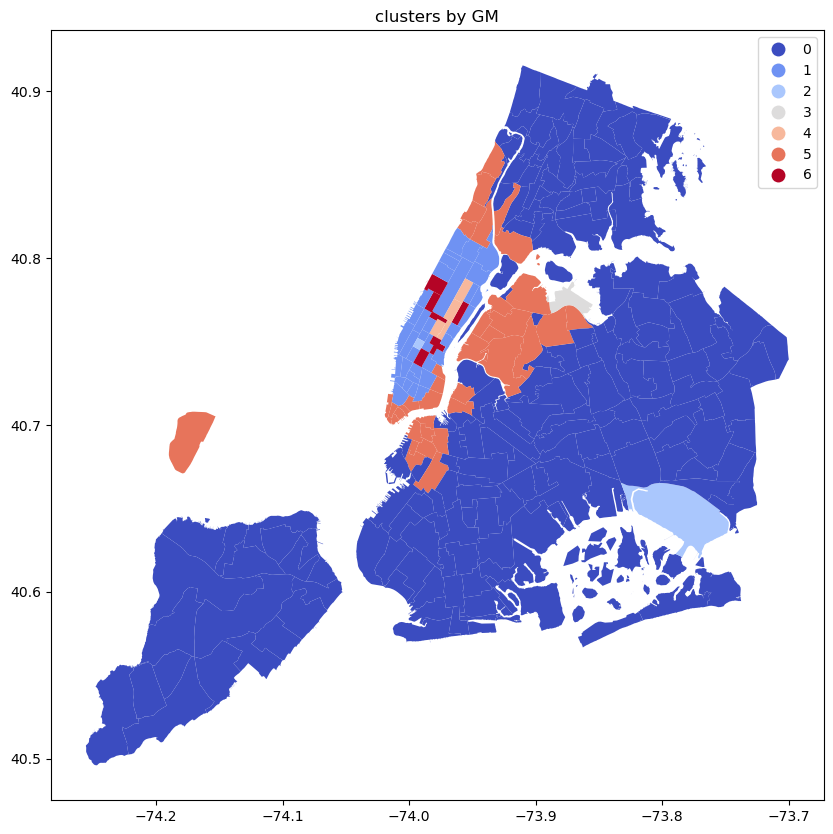

In [86]:
for i in range(6):
    dfevening=dfeve1
    gmm = GaussianMixture(n_components=i+2,random_state=100)
    res = gmm.fit(dfeve1[['ave_dis','N_trips']])
    dfevening['cluster']=gmm.predict(dfeve1[['ave_dis','N_trips']])
    dfevening = taxi.merge(dfevening, left_on='location_i', right_on='PULocationID')
    dfevening['cluster'] = dfevening['cluster'].astype(str)
    
    fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(20,10))
    dfevening.plot(column='cluster',cmap='coolwarm', 
                                          legend=True,ax=ax)
    plt.title('clusters by GM')
    #print('Cluster assignments:',km.labels_)
    print('\nCluster centers:\n',res.means_)
    print('\nLog-likelihood per sample:',res.score(dfeve1[['ave_dis','N_trips']]))